In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np 

scaler = MinMaxScaler()

In [2]:
del_columns = []
pd.set_option('display.float_format', '{:.4f}'.format)

url = "https://www.dropbox.com/scl/fi/uvv7j1bragzqkz9zwyvj0/sample_mmp.csv?rlkey=i0mlaxzq6e3blblfu9mhrdpsm&e=1&dl=1"
df = pd.read_csv(url)

df

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/2261725290.py:5: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Unnamed: 0                 MachineIdentifier   ProductName  \
0          8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   
1          8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   
2          2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   
3          1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   
4           236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   
...            ...                               ...           ...   
499995     5826339  a739cacc292f3f1e745827c1ca6c6ada  win8defender   
499996     5740034  a4c232d528d98343e8f1b73650da7b82  win8defender   
499997     8819786  fd16cd542d660848d272e4552bcccb1e  win8defender   
499998     8713685  fa0841f8f6147de7c3d287e05270ed42  win8defender   
499999     4295573  7b45dc3537e17f16305c5983ca0a1cb9  win8defender   

       EngineVersion        AppVersion  AvSigVersion  IsBeta  \
0        1.1.15100.1   4.18.1807.18075  1.273.1234.0       0   
1        1.1.15100.1   4.18.1807.18075  1.273.1282.0       0   
2        1.1.15100.1    4.9.10586.1106   1.273.781.0       0   
3        1.1.15200.1   4.18.1807.18075  1.275.1639.0       0   
4        1.1.15200.1   4.18.1807.18075   1.275.511.0       0   
...              ...               ...           ...     ...   
499995   1.1.15200.1   4.18.1807.18075  1.275.1090.0       0   
499996   1.1.15100.1   4.18.1807.18075  1.273.1620.0       0   
499997   1.1.15300.5    4.13.17134.112  1.275.1343.0       0   
499998   1.1.15100.1  4.14.17639.18041   1.273.483.0       0   
499999   1.1.15100.1   4.18.1807.18075  1.273.1644.0       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
0                 7.0000                 0                        NaN  ...   
1                 7.0000                 0                        NaN  ...   
2                 7.0000                 0                        NaN  ...   
3                 7.0000                 0                        NaN  ...   
4                 7.0000                 0                        NaN  ...   
...                  ...               ...                        ...  ...   
499995            7.0000                 0                        NaN  ...   
499996            7.0000                 0                        NaN  ...   
499997            7.0000                 0                        NaN  ...   
499998            7.0000                 0                        NaN  ...   
499999            7.0000                 0                        NaN  ...   

        Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                             19951.0000                           0   
1                             48753.0000                           0   
2                             33111.0000                           1   
3                             48473.0000                           1   
4                              4343.0000                           1   
...                                  ...                         ...   
499995                        33088.0000                           1   
499996                               NaN                           0   
499997                        41727.0000                           0   
499998                        11947.0000                           0   
499999                        12103.0000                           0   

        Census_IsWIMBootEnabled  Census_IsVirtualDevice  \
0                           NaN                  0.0000   
1                        0.0000                  0.0000   
2                        0.0000                  0.0000   
3                           NaN                  0.0000   
4                           NaN                  0.0000   
...                         ...                     ...   
499995                   0.0000                  0.0000   
499996                      NaN                  0.0000   
499997                      NaN                  0.0000   
499998

In [3]:
fran_columns = list(df.columns[0:21])
ignacio_columns = list(df.columns[21:42])
marc_columns = list(df.columns[42:63])
alvaro_columns = list(df.columns[63:85])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [5]:
df.describe().T

count            mean  \
Unnamed: 0                                        500000.0000    4458888.2675   
IsBeta                                            500000.0000          0.0000   
RtpStateBitfield                                  498168.0000          6.8462   
IsSxsPassiveMode                                  500000.0000          0.0172   
DefaultBrowsersIdentifier                          24061.0000       1652.8245   
AVProductStatesIdentifier                         498062.0000      47850.9084   
AVProductsInstalled                               498062.0000          1.3268   
AVProductsEnabled                                 498062.0000          1.0207   
HasTpm                                            500000.0000          0.9878   
CountryIdentifier                                 500000.0000        108.0375   
CityIdentifier                                    481760.0000      81271.6460   
OrganizationIdentifier                            345437.0000         24.8699   
GeoNameIdentifier                                 499984.0000        169.7304   
LocaleEnglishNameIdentifier                       500000.0000        122.6110   
OsBuild                                           500000.0000      15726.9338   
OsSuite                                           500000.0000        574.7186   
IsProtected                                       498074.0000          0.9458   
AutoSampleOptIn                                   500000.0000          0.0000   
SMode                                             470152.0000          0.0004   
IeVerIdentifier                                   496791.0000        126.6626   
Firewall                                          494838.0000          0.9782   
UacLuaenable                                      499377.0000         13.7250   
Census_OEMNameIdentifier                          494619.0000       2218.6465   
Census_OEMModelIdentifier                         494236.0000     239128.0469   
Census_ProcessorCoreCount                         497653.0000          3.9941   
Census_ProcessorManufacturerIdentifier            497653.0000          4.5291   
Census_ProcessorModelIdentifier                   497651.0000       2370.9865   
Census_PrimaryDiskTotalCapacity                   497024.0000     514043.3159   
Census_SystemVolumeTotalCapacity                  497024.0000     378054.6393   
Census_HasOpticalDiskDrive                        500000.0000          0.0770   
Census_TotalPhysicalRAM                           495444.0000       6129.2322   
Census_InternalPrimaryDiagonalDisplaySizeInInches 497346.0000         16.6898   
Census_InternalPrimaryDisplayResolutionHorizontal 497350.0000       1548.3043   
Census_InternalPrimaryDisplayResolutionVertical   497350.0000        898.2393   
Census_InternalBatteryNumberOfCharges             484962.0000 1125600150.2055   
Census_OSBuildNumber                              500000.0000      15841.3726   
Census_OSBuildRevision                            500000.0000        967.2248   
Census_OSInstallLanguageIdentifier                496668.0000         14.6055   
Census_OSUILocaleIdentifier                       500000.0000         60.4463   
Census_IsPortableOperatingSystem                  500000.0000          0.0005   
Census_IsFlightingInternal                         84775.0000          0.0000   
Census_IsFlightsDisabled                          491067.0000          0.0000   
Census_ThresholdOptIn                             181896.0000          0.0003   
Census_FirmwareManufacturerIdentifier             489651.0000        402.6759   
Census_FirmwareVersionIdentifier                  490939.0000      33030.9889   
Census_IsSecureBootEnabled                        500000.0000          0.4854   
Census_IsWIMBootEnabled                           182334.0000          0.0000   
Census_IsVirtualDevice                            499099.0000          0.0071   
Census_IsTouchEnabled                             500000.0000          0.1254   
Census

## Parte JUANFRAN

### "Unnamed: 0"

In [6]:
df["Unnamed: 0"].value_counts()

Unnamed: 0
8427007    1
4076126    1
7315011    1
7257590    1
4851285    1
          ..
3391674    1
6246089    1
42434      1
7181890    1
4295573    1
Name: count, Length: 500000, dtype: int64

In [7]:
df["Unnamed: 0"].nunique()

500000

Podemos ver que la columna "Unnamed: 0" contiene valores unicos que no se repiten, por lo que podemos suponer que a lo mejor puede ser algun tipo de indice interno que tiene la BBDD, por lo que prescindiremos de esta columna

In [8]:
del_columns.append("Unnamed: 0")

### "MachineIdentifier"

In [9]:
df["MachineIdentifier"].value_counts()

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    1
74f5f637add24668804961d81cca7697    1
d1e0560ad7cd178b32599edb67142737    1
d03a6fb0852e2ad3380e689a80d23273    1
8b3a780e6980a83b1650e7fc873dcfd1    1
                                   ..
6154953dc05531cad9fb680cf39990b4    1
b345b8ccc72ba43e7417b2018fb61444    1
013b44e10f97fa8f71b6b76e24323d51    1
ce0e5ba490a2455a87d09184b9bbd578    1
7b45dc3537e17f16305c5983ca0a1cb9    1
Name: count, Length: 500000, dtype: int64

In [10]:
df["MachineIdentifier"].nunique()

500000

Podemos ver que en esta columna ocurre algo parecido, todos los valores son distintos y por el nombre de la columna podemos saber que contiene el identificador de los dispositivos, por lo que prescindiremos de esta columna

In [11]:
del_columns.append("MachineIdentifier")

### "ProductName"

In [12]:
df["ProductName"].value_counts()

ProductName
win8defender     494604
mse                5395
mseprerelease         1
Name: count, dtype: int64

In [13]:
df["ProductName"].value_counts()/df.shape[0]  # càlculo de proporciones

ProductName
win8defender    0.9892
mse             0.0108
mseprerelease   0.0000
Name: count, dtype: float64

Podemos ver que tenemos 3 valores distintos, pero el valor win8defender aparece 98% de las veces

<Axes: >

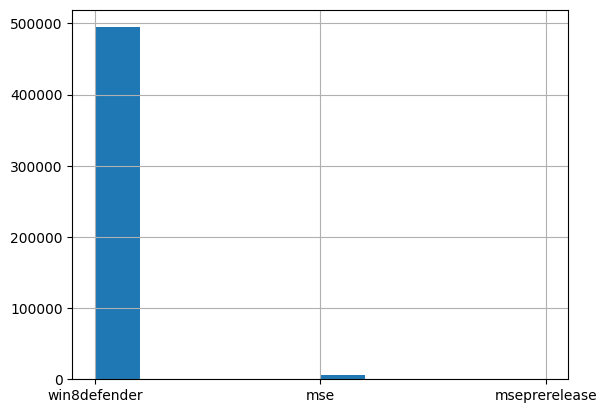

In [14]:
df["ProductName"].hist()

Decidimos por eliminar la columna

In [15]:
del_columns.append("ProductName")

### "EngineVersion"

In [16]:
df["EngineVersion"].value_counts().sort_index()

EngineVersion
1.1.10401.0         1
1.1.11701.0         3
1.1.12101.0         7
1.1.12400.0         1
1.1.12603.0         3
1.1.12706.0         1
1.1.12804.0         4
1.1.12805.0       115
1.1.12902.0       321
1.1.13000.0       220
1.1.13102.0         1
1.1.13103.0       235
1.1.13202.0       245
1.1.13303.0       516
1.1.13406.0         1
1.1.13407.0       479
1.1.13504.0      3876
1.1.13601.0       420
1.1.13701.0       255
1.1.13704.0       255
1.1.13802.0         4
1.1.13803.0         3
1.1.13804.0       513
1.1.13902.0         4
1.1.13903.0       515
1.1.14001.0         2
1.1.14002.0         2
1.1.14003.0       804
1.1.14102.0         2
1.1.14103.0         5
1.1.14104.0      5240
1.1.14201.0        11
1.1.14202.0       840
1.1.14303.0        10
1.1.14305.0       270
1.1.14306.0      1329
1.1.14405.2      1972
1.1.14500.2        19
1.1.14500.5      2591
1.1.14600.4      9005
1.1.14700.3        61
1.1.14700.4        65
1.1.14700.5      2593
1.1.14800.1        51
1.1.14800.3      7

Vemos que hay varios valores en esta columna, ahora comprobaremos si el EngineVersion tiene que ver con la columna ProductName

In [17]:
df[df["ProductName"] == "mse"]["EngineVersion"].value_counts()

EngineVersion
1.1.15200.1    2477
1.1.15100.1    2246
1.1.15000.2     223
1.1.14901.4     152
1.1.14800.3      84
1.1.15300.6      61
1.1.14700.5      33
1.1.14600.4      26
1.1.14306.0      25
1.1.14500.5      16
1.1.14405.2      14
1.1.14202.0      10
1.1.14305.0       6
1.1.14003.0       4
1.1.13601.0       2
1.1.13903.0       2
1.1.13804.0       2
1.1.14104.0       2
1.1.15300.5       1
1.1.13407.0       1
1.1.13000.0       1
1.1.13504.0       1
1.1.13202.0       1
1.1.12902.0       1
1.1.14700.4       1
1.1.13704.0       1
1.1.14800.1       1
1.1.14700.3       1
Name: count, dtype: int64

In [18]:
df[df["EngineVersion"] == "1.1.15100.1"]

Unnamed: 0                 MachineIdentifier   ProductName  \
0          8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   
1          8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   
2          2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   
7           985557  1c4ec21828b563afb6b0aa72ef88926d  win8defender   
8           387390  0b247aa88737776d0f88ce4dee447216  win8defender   
...            ...                               ...           ...   
499991     2159235  3df610b8bec46c7af0dd50c74756bf7e  win8defender   
499993     7526638  d7f1b593177768d66a2905b09a43a4d5  win8defender   
499996     5740034  a4c232d528d98343e8f1b73650da7b82  win8defender   
499998     8713685  fa0841f8f6147de7c3d287e05270ed42  win8defender   
499999     4295573  7b45dc3537e17f16305c5983ca0a1cb9  win8defender   

       EngineVersion        AppVersion  AvSigVersion  IsBeta  \
0        1.1.15100.1   4.18.1807.18075  1.273.1234.0       0   
1        1.1.15100.1   4.18.1807.18075  1.273.1282.0       0   
2        1.1.15100.1    4.9.10586.1106   1.273.781.0       0   
7        1.1.15100.1   4.18.1806.18062   1.273.293.0       0   
8        1.1.15100.1   4.18.1807.18075   1.273.418.0       0   
...              ...               ...           ...     ...   
499991   1.1.15100.1   4.18.1806.18062   1.273.520.0       0   
499993   1.1.15100.1   4.18.1807.18075  1.273.1420.0       0   
499996   1.1.15100.1   4.18.1807.18075  1.273.1620.0       0   
499998   1.1.15100.1  4.14.17639.18041   1.273.483.0       0   
499999   1.1.15100.1   4.18.1807.18075  1.273.1644.0       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
0                 7.0000                 0                        NaN  ...   
1                 7.0000                 0                        NaN  ...   
2                 7.0000                 0                        NaN  ...   
7                 7.0000                 0                        NaN  ...   
8                 7.0000                 0                        NaN  ...   
...                  ...               ...                        ...  ...   
499991            7.0000                 0                        NaN  ...   
499993            7.0000                 0                        NaN  ...   
499996            7.0000                 0                        NaN  ...   
499998            7.0000                 0                        NaN  ...   
499999            7.0000                 0                        NaN  ...   

        Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                             19951.0000                           0   
1                             48753.0000                           0   
2                             33111.0000                           1   
7                                    NaN                           0   
8                             20106.0000                           1   
...                                  ...                         ...   
499991                        12303.0000                           1   
499993                        12164.0000                           0   
499996                               NaN                           0   
499998                        11947.0000                           0   
499999                        12103.0000                           0   

        Census_IsWIMBootEnabled  Census_IsVirtualDevice  \
0                           NaN                  0.0000   
1                        0.0000                  0.0000   
2                        0.0000                  0.0000   
7                           NaN                  0.0000   
8                           NaN                  0.0000   
...                         ...                     ...   
499991                      NaN                  0.0000   
499993                   0.0000                  0.0000   
499996                      NaN                  0.0000   
499998

Por lo que podemos ver no tienen nada que ver por lo que puede llegar a ser interesante mantenerla, además, podríamos elimnar el ultimo número de la versión para poder agruparlas un poco más

In [19]:
df["EngineVersion"].str.rsplit(".", n=1).str[0]

0         1.1.15100
1         1.1.15100
2         1.1.15100
3         1.1.15200
4         1.1.15200
            ...    
499995    1.1.15200
499996    1.1.15100
499997    1.1.15300
499998    1.1.15100
499999    1.1.15100
Name: EngineVersion, Length: 500000, dtype: object

In [20]:
df["EngineVersion_trimmed"] = df["EngineVersion"].str.rsplit(".", n=1).str[0]
df["EngineVersion_trimmed"] = df["EngineVersion_trimmed"].str.rsplit(".", n=1).str[-1]

del_columns.append("EngineVersion")

In [21]:
df["EngineVersion_trimmed"].value_counts().sort_index()

EngineVersion_trimmed
10401         1
11701         3
12101         7
12400         1
12603         3
12706         1
12804         4
12805       115
12902       321
13000       220
13102         1
13103       235
13202       245
13303       516
13406         1
13407       479
13504      3876
13601       420
13701       255
13704       255
13802         4
13803         3
13804       513
13902         4
13903       515
14001         2
14002         2
14003       804
14102         2
14103         5
14104      5240
14201        11
14202       840
14303        10
14305       270
14306      1329
14405      1972
14500      2610
14600      9005
14700      2719
14800      7599
14901     12055
15000     14890
15100    205494
15200    216491
15300     10652
Name: count, dtype: int64

### "AppVersion"

In [22]:
df["AppVersion"].value_counts().sort_index()

AppVersion
4.10.14393.0       4399
4.10.14393.1066     404
4.10.14393.1198    1271
4.10.14393.1532       7
4.10.14393.1593     536
                   ... 
4.9.10586.873       228
4.9.10586.916       311
4.9.10586.962       262
4.9.10586.965       266
4.9.218.0           334
Name: count, Length: 95, dtype: int64

In [23]:
df[df["ProductName"] == "mse"]["AppVersion"].value_counts()

AppVersion
4.10.209.0    4843
4.9.218.0      334
4.8.204.0       96
4.10.205.0      49
4.7.205.0       24
4.4.304.0       24
4.6.305.0       15
4.5.216.0       10
Name: count, dtype: int64

In [24]:
df[df["AppVersion"] == "4.10.209.0"]

Unnamed: 0                 MachineIdentifier   ProductName  \
87         3560007  662ca74a64aa88d371f2c7cfe6a2c890  win8defender   
121         289101  0850c1e591b177e4e7bd3d7e73f050a4           mse   
209        4540438  82511d4f7473708cd7bb3a7a7276931f  win8defender   
222         455635  0d1a8a25d471a45a46acc6470e2ff39d           mse   
223        7431707  d5380a5748ba45c8c126bdee0bdd5d0d           mse   
...            ...                               ...           ...   
499746      244927  070ad6da917516ea0691a8fb826f55b0           mse   
499766     2878358  52969eef94139c8e49df6479830539f2           mse   
499807     2878404  529703099031a605aba0b00ece4cac92  win8defender   
499824     7150496  cd27813a5e444c0406f4b1d3e7cad827           mse   
499851     5036960  908c99e617f11f8de3b1d5f77a69a6c7  win8defender   

       EngineVersion  AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
87       1.1.14405.2  4.10.209.0  1.259.1414.0       0            7.0000   
121      1.1.15100.1  4.10.209.0  1.273.1826.0       0            7.0000   
209      1.1.14901.3  4.10.209.0  1.267.1242.0       0            7.0000   
222      1.1.15000.2  4.10.209.0   1.271.884.0       0            7.0000   
223      1.1.15200.1  4.10.209.0   1.275.710.0       0            7.0000   
...              ...         ...           ...     ...               ...   
499746   1.1.15100.1  4.10.209.0   1.273.912.0       0            7.0000   
499766   1.1.15200.1  4.10.209.0   1.275.725.0       0            7.0000   
499807   1.1.15200.1  4.10.209.0  1.275.1478.0       0            7.0000   
499824   1.1.15100.1  4.10.209.0    1.273.66.0       0            7.0000   
499851   1.1.15200.1  4.10.209.0   1.275.810.0       0            7.0000   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
87                     0                   223.0000  ...   
121                    0                        NaN  ...   
209                    0                        NaN  ...   
222                    0                        NaN  ...   
223                    0                        NaN  ...   
...                  ...                        ...  ...   
499746                 0                        NaN  ...   
499766                 0                        NaN  ...   
499807                 0                        NaN  ...   
499824                 0                        NaN  ...   
499851                 0                        NaN  ...   

        Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
87                               0                   0.0000   
121                              0                   0.0000   
209                              1                   0.0000   
222                              0                   0.0000   
223                              0                   0.0000   
...                            ...                      ...   
499746                           0                      NaN   
499766                           0                      NaN   
499807                           0                   0.0000   
499824                           0                      NaN   
499851                           1                   0.0000   

        Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
87                      0.0000                      0                    0   
121                     0.0000                      0                    0   
209                     0.0000                      0                    0   
222                     0.0000                      0                    0   
223                     0.0000                      0                    0   
...                        ...                    ...                  ...   
499746                  0.0000                      0                    0   
499766                  0.0000                      0                    0   
499807                  0.0000                      0                    0

Podemos ver que el AppVersion y el ProductName no tienen relación por lo que haremos lo mismo que con la columna EngineVersion

In [25]:
df["AppVersion_trimmed"] = df["AppVersion"].str.split(".").str[1]

del_columns.append("AppVersion")

In [26]:
df["EngineVersion_trimmed"].value_counts().sort_index()

EngineVersion_trimmed
10401         1
11701         3
12101         7
12400         1
12603         3
12706         1
12804         4
12805       115
12902       321
13000       220
13102         1
13103       235
13202       245
13303       516
13406         1
13407       479
13504      3876
13601       420
13701       255
13704       255
13802         4
13803         3
13804       513
13902         4
13903       515
14001         2
14002         2
14003       804
14102         2
14103         5
14104      5240
14201        11
14202       840
14303        10
14305       270
14306      1329
14405      1972
14500      2610
14600      9005
14700      2719
14800      7599
14901     12055
15000     14890
15100    205494
15200    216491
15300     10652
Name: count, dtype: int64

### "AvSigVersion"

In [27]:
df["AvSigVersion"].value_counts().sort_index()

AvSigVersion
0.0.0.0           4
1.169.55.0        1
1.199.1615.0      3
1.207.1891.0      1
1.207.2950.0      6
               ... 
1.277.51.0      411
1.277.58.0       76
1.277.62.0       80
1.277.64.0       60
1.277.67.0        7
Name: count, Length: 6455, dtype: int64

In [28]:
df.groupby('AvSigVersion')['HasDetections'].mean().sort_values(ascending=False)

AvSigVersion
1.259.116.0    1.0000
1.229.460.0    1.0000
1.245.137.0    1.0000
1.245.1169.0   1.0000
1.245.1102.0   1.0000
                ...  
1.247.913.0    0.0000
1.247.929.0    0.0000
1.247.93.0     0.0000
1.247.931.0    0.0000
0.0.0.0        0.0000
Name: HasDetections, Length: 6455, dtype: float64

Vamos a comprobar cuantos de los valores terminan con ".0"

In [29]:
df[df["AvSigVersion"].str.endswith(".0")]["AvSigVersion"].count() / df.shape[0]

1.0

Con este codigo filtro por los valores de la columna "AvSigVersion" que terminen en ".0" y cuento cuantos valores recupero y lo divido entre el total de filas del dataset.

Y podemos ver que todos los valores de esta columna terminan con ".0" (el 100%), por lo que eliminaré el ".0"

In [30]:
df["AvSigVersion_trimmed"] = df["AvSigVersion"].str.rsplit(".", n=1).str[0]

del_columns.append("AvSigVersion")

In [31]:
df["AvSigVersion_trimmed"].value_counts().sort_index()

AvSigVersion_trimmed
0.0.0           4
1.169.55        1
1.199.1615      3
1.207.1891      1
1.207.2950      6
             ... 
1.277.51      411
1.277.58       76
1.277.62       80
1.277.64       60
1.277.67        7
Name: count, Length: 6455, dtype: int64

Comprobamos que todos empiezan por 1.

In [32]:
df[~df['AvSigVersion_trimmed'].str.startswith("1.")]['AvSigVersion_trimmed']

136234    0.0.0
337901    0.0.0
349972    0.0.0
434137    0.0.0
Name: AvSigVersion_trimmed, dtype: object

Vemos que no empiezan con 1. y tienen de valor 0.0.0, por lo cual los eliminamos

In [33]:
df[df['AvSigVersion_trimmed'].str.startswith("1.")]['AvSigVersion_trimmed']

0         1.273.1234
1         1.273.1282
2          1.273.781
3         1.275.1639
4          1.275.511
             ...    
499995    1.275.1090
499996    1.273.1620
499997    1.275.1343
499998     1.273.483
499999    1.273.1644
Name: AvSigVersion_trimmed, Length: 499996, dtype: object

In [34]:
df = df[df['AvSigVersion_trimmed'].str.startswith("1.")]
df['AvSigVersion_trimmed'] = df['AvSigVersion_trimmed'].apply(lambda x: x.split(".")[1])

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/3742774233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AvSigVersion_trimmed'] = df['AvSigVersion_trimmed'].apply(lambda x: x.split(".")[1])


### "IsBeta"

In [35]:
df["IsBeta"].value_counts()

IsBeta
0    499995
1         1
Name: count, dtype: int64

Podemos ver que el valor True de "IsBeta" es tan solo 1 contra el resto de datos, por lo que prescendiremos de esta columna

In [36]:
del_columns.append("IsBeta")

### "RtpStateBitfield"

In [37]:
df["RtpStateBitfield"].value_counts()

RtpStateBitfield
7.0000     484841
0.0000      10610
8.0000       1277
5.0000       1157
3.0000        175
1.0000        103
35.0000         1
Name: count, dtype: int64

In [38]:
print(df[["RtpStateBitfield", "HasDetections"]].corr())

                  RtpStateBitfield  HasDetections
RtpStateBitfield            1.0000         0.0403
HasDetections               0.0403         1.0000


Por su baja correlación con el target prescindiremos de esta columna

In [39]:
del_columns.append("RtpStateBitfield")

### "IsSxsPassiveMode"

In [40]:
df["IsSxsPassiveMode"].value_counts()

IsSxsPassiveMode
0    491375
1      8621
Name: count, dtype: int64

In [41]:
df["IsSxsPassiveMode"].value_counts()/ df.shape[0]

IsSxsPassiveMode
0   0.9828
1   0.0172
Name: count, dtype: float64

Podemos ver que el valor True de esta columna representa menos del 2% del dataframe

In [42]:
print(df[["IsSxsPassiveMode", "HasDetections"]].corr())

                  IsSxsPassiveMode  HasDetections
IsSxsPassiveMode            1.0000        -0.0340
HasDetections              -0.0340         1.0000


No esta balanceado y tiene una correlación debil con el target, por lo que prescindiremos de esta columna

In [43]:
del_columns.append("IsSxsPassiveMode")

### "DefaultBrowsersIdentifier"

In [44]:
df["DefaultBrowsersIdentifier"].value_counts()

DefaultBrowsersIdentifier
239.0000     2589
3195.0000    2423
1632.0000    1601
3176.0000    1313
146.0000     1231
             ... 
2285.0000       1
2100.0000       1
2459.0000       1
2196.0000       1
1427.0000       1
Name: count, Length: 554, dtype: int64

In [45]:
print(df[["DefaultBrowsersIdentifier", "HasDetections"]].corr())

                           DefaultBrowsersIdentifier  HasDetections
DefaultBrowsersIdentifier                     1.0000         0.0010
HasDetections                                 0.0010         1.0000


Por la baja correlación con el target, esta columna será eliminada

In [46]:
del_columns.append("DefaultBrowsersIdentifier")

### "AVProductStatesIdentifier"

In [47]:
df["AVProductStatesIdentifier"].value_counts()

AVProductStatesIdentifier
53447.0000    326463
7945.0000      26642
47238.0000     18436
62773.0000     14931
46413.0000      6343
               ...  
2451.0000          1
19604.0000         1
3193.0000          1
26492.0000         1
18324.0000         1
Name: count, Length: 5516, dtype: int64

In [48]:
print(df[["AVProductStatesIdentifier", "HasDetections"]].corr())

                           AVProductStatesIdentifier  HasDetections
AVProductStatesIdentifier                     1.0000         0.1162
HasDetections                                 0.1162         1.0000


Mantendremos la columna temporalmente y probaremos entrenar al modelo con y sin esta columna

Al mirar la info del dataset vimos que esta columna contenia nulos

In [49]:
df["AVProductStatesIdentifier"].isna().sum()/df.shape[0]

0.003876031008248066

Podemos ver que menos del 1% de los datos en esta columna es nulo, por lo que borraremos las filas que contienen nulo

In [50]:
df.dropna(subset=["AVProductStatesIdentifier"], inplace=True)

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/3301016493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["AVProductStatesIdentifier"], inplace=True)


<Axes: >

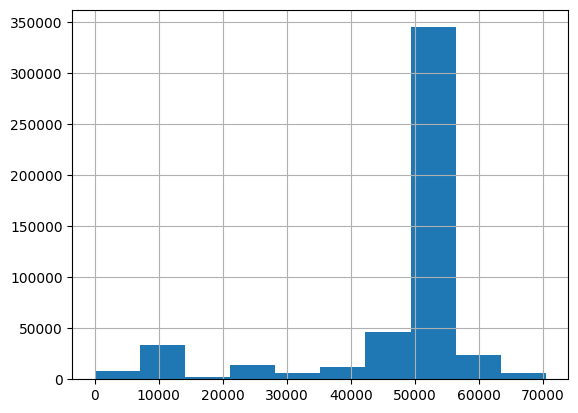

In [51]:
df["AVProductStatesIdentifier"].hist()

### "AVProductsInstalled"

In [52]:
df["AVProductsInstalled"].value_counts()

AVProductsInstalled
1.0000    348046
2.0000    137852
3.0000     11617
4.0000       514
5.0000        29
Name: count, dtype: int64

In [53]:
df["AVProductsInstalled"] = df["AVProductsInstalled"].apply(lambda x: 3 if x not in list([1, 2]) else x)

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/1594347888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AVProductsInstalled"] = df["AVProductsInstalled"].apply(lambda x: 3 if x not in list([1, 2]) else x)


In [54]:
print(df[["AVProductsInstalled", "HasDetections"]].corr())

                     AVProductsInstalled  HasDetections
AVProductsInstalled               1.0000        -0.1490
HasDetections                    -0.1490         1.0000


Esta variable podría resultar interesante, aun siendo muy poca correlación negativa, es interesante ver que en algunos casos al tener más antivirus instalados pues se detectan menos virus

Anteriormente al mirar la info del dataset, vimos que esta columna tenía nulos

In [55]:
df["AVProductsInstalled"].isna().sum()

0

Ahora contiene 0% de nulos, así que podemos suponer que las filas con nulos en la columna "AVProductStatesIdentifier" coincidian con las de esta columna, ya que ambas tenían 1938 nulos

<Axes: >

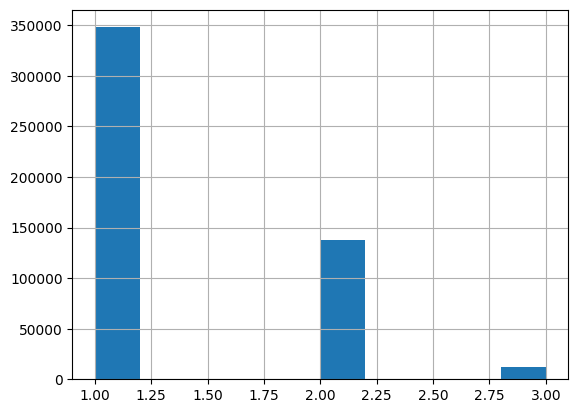

In [56]:
df["AVProductsInstalled"].hist()

### "AVProductsEnabled"

In [57]:
df["AVProductsEnabled"].value_counts()

AVProductsEnabled
1.0000    485175
2.0000     11074
0.0000      1467
3.0000       316
4.0000        26
Name: count, dtype: int64

In [58]:
df['AVProductsEnabled'] = df['AVProductsEnabled'].apply(lambda x: 2 if x not in list([0, 1]) else x)

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/3225264113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AVProductsEnabled'] = df['AVProductsEnabled'].apply(lambda x: 2 if x not in list([0, 1]) else x)


In [59]:
print(df[["AVProductsEnabled", "HasDetections"]].corr())

                   AVProductsEnabled  HasDetections
AVProductsEnabled             1.0000        -0.0422
HasDetections                -0.0422         1.0000


In [60]:
print(df[["AVProductsEnabled", "AVProductsInstalled"]].corr())

                     AVProductsEnabled  AVProductsInstalled
AVProductsEnabled               1.0000               0.2740
AVProductsInstalled             0.2740               1.0000


Tiene muy baja relación con el target pero es algo más alta (casi 30%) de correlación con AVProductsInstalled, por lo que podemos mantenerla temporalmente y hacer pruebas

In [61]:
df["AVProductsEnabled"].isna().sum()/df.shape[0]

0.0

Ahora contiene 0% de nulos, así que podemos suponer que las filas con nulos en las 2 ultimas columnas coincidian con las de esta columna, ya que las 3 tenían 1938 nulos

<Axes: >

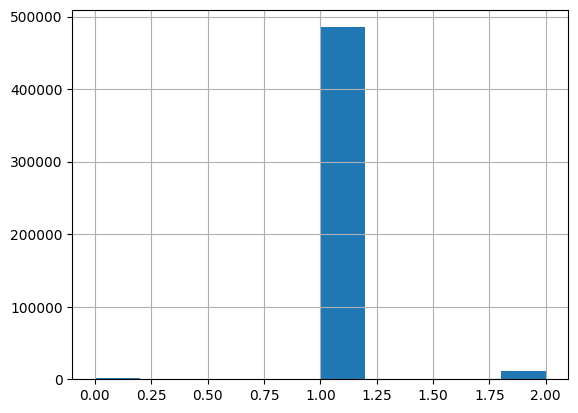

In [62]:
df["AVProductsEnabled"].hist()

### "HasTpm"

In [63]:
df["HasTpm"].value_counts()

HasTpm
1    492109
0      5949
Name: count, dtype: int64

In [64]:
df["HasTpm"].value_counts()/df.shape[0]

HasTpm
1   0.9881
0   0.0119
Name: count, dtype: float64

In [65]:
print(df[["HasTpm", "HasDetections"]].corr())

               HasTpm  HasDetections
HasTpm         1.0000         0.0075
HasDetections  0.0075         1.0000


Al ver que hay un fuerte desequilibrio en cuanto a los valores y que su correlación con el target es muy debil, prescindiremos de la columna

In [66]:
del_columns.append("HasTpm")

### "CountryIdentifier"

In [67]:
df["CountryIdentifier"].value_counts()

CountryIdentifier
43     22278
29     19165
141    18349
93     16158
171    15683
       ...  
212       13
37        12
165       11
217       10
193        9
Name: count, Length: 222, dtype: int64

In [68]:
print(df[["CountryIdentifier", "HasDetections"]].corr())

                   CountryIdentifier  HasDetections
CountryIdentifier             1.0000         0.0066
HasDetections                 0.0066         1.0000


Por la baja correlación con el target, esta columna será eliminada

In [69]:
del_columns.append("CountryIdentifier")

### "CityIdentifier"

In [70]:
df["CityIdentifier"].value_counts()

CityIdentifier
130775.0000    5248
16668.0000     4727
82373.0000     4636
10222.0000     3995
61668.0000     3716
               ... 
83257.0000        1
99092.0000        1
81950.0000        1
96235.0000        1
148194.0000       1
Name: count, Length: 37070, dtype: int64

In [71]:
df["CityIdentifier"].isna().sum()/df.shape[0]

0.03647767930642616

In [72]:
print(df[["CityIdentifier", "HasDetections"]].corr())

                CityIdentifier  HasDetections
CityIdentifier          1.0000        -0.0046
HasDetections          -0.0046         1.0000


Por la baja correlación con el target, esta columna será eliminada

In [73]:
del_columns.append("CityIdentifier")

### "OrganizationIdentifier"

In [74]:
df["OrganizationIdentifier"].value_counts()

OrganizationIdentifier
27.0000    234042
18.0000     98471
48.0000      3643
50.0000      2529
37.0000      1030
11.0000      1028
49.0000       744
46.0000       638
14.0000       254
32.0000       224
36.0000       207
52.0000       173
33.0000       171
2.0000        153
5.0000        110
40.0000       100
28.0000        97
4.0000         78
10.0000        69
51.0000        52
1.0000         39
20.0000        38
8.0000         37
6.0000         25
31.0000        23
47.0000        22
22.0000        21
39.0000        21
3.0000         20
21.0000        19
16.0000        16
19.0000        10
29.0000         8
42.0000         8
7.0000          7
44.0000         6
26.0000         6
43.0000         4
45.0000         4
41.0000         2
35.0000         2
23.0000         2
25.0000         1
17.0000         1
Name: count, dtype: int64

In [75]:
df["OrganizationIdentifier"].isna().sum()/df.shape[0]

0.3090061800031322

Podemos ver que el 30% de esta columna es nulo, por lo que antes de valorar si eliminarla o no, comprobaremos su correlación con el target

In [76]:
print(df[["OrganizationIdentifier", "HasDetections"]].corr())

                        OrganizationIdentifier  HasDetections
OrganizationIdentifier                  1.0000         0.0053
HasDetections                           0.0053         1.0000


Al tener una correlación tan baja suponemos que la columna probablemente no tenga un impacto significativo, por lo que prescindiremos de la columna

In [77]:
del_columns.append("OrganizationIdentifier")

### "GeoNameIdentifier"

In [78]:
df["GeoNameIdentifier"].value_counts()

GeoNameIdentifier
277.0000    85608
211.0000    23505
53.0000     22924
89.0000     20097
240.0000    19392
            ...  
280.0000        1
231.0000        1
113.0000        1
221.0000        1
132.0000        1
Name: count, Length: 268, dtype: int64

In [79]:
print(df[["GeoNameIdentifier", "HasDetections"]].corr())

                   GeoNameIdentifier  HasDetections
GeoNameIdentifier             1.0000         0.0037
HasDetections                 0.0037         1.0000


Por la baja correlación con el target, esta columna será eliminada

In [80]:
del_columns.append("GeoNameIdentifier")

### "LocaleEnglishNameIdentifier"

In [81]:
df["LocaleEnglishNameIdentifier"].value_counts()

LocaleEnglishNameIdentifier
75     117295
182     25092
42      22954
74      22824
88      20910
        ...  
152         1
155         1
165         1
190         1
127         1
Name: count, Length: 233, dtype: int64

In [82]:
print(df[["LocaleEnglishNameIdentifier", "HasDetections"]].corr())

                             LocaleEnglishNameIdentifier  HasDetections
LocaleEnglishNameIdentifier                       1.0000         0.0169
HasDetections                                     0.0169         1.0000


Por la baja correlación con el target, esta columna será eliminada

In [83]:
del_columns.append("LocaleEnglishNameIdentifier")

### "Platform"

In [84]:
df["Platform"].value_counts()

Platform
windows10    482078
windows8      10701
windows7       5279
Name: count, dtype: int64

<Axes: >

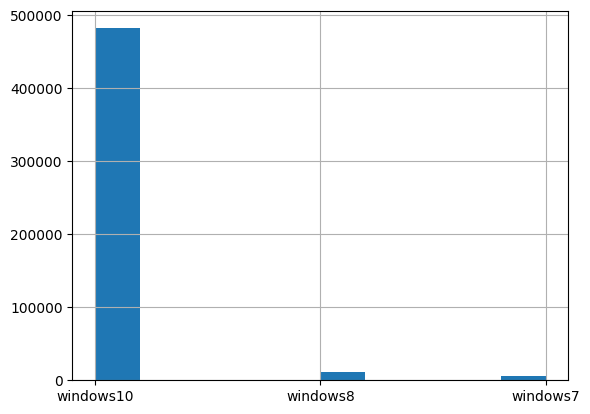

In [85]:
df["Platform"].hist()

Aunque los valores estan muy desbalanceados, haremos pruebas y según los resultados de estas veremos si mantener o no la columna

El siguiente punto será hacer un OHE con esta columna

In [86]:
df = pd.get_dummies(df, columns=["Platform"], prefix="Platform")

### "Processor"

In [87]:
df["Processor"].value_counts()

Processor
x64      452557
x86       45487
arm64        14
Name: count, dtype: int64

<Axes: >

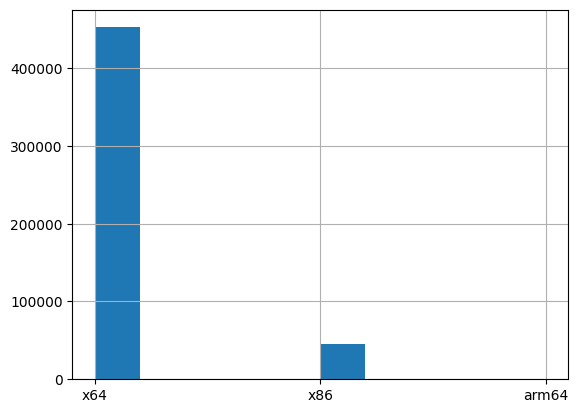

In [88]:
df["Processor"].hist()

Aunque los valores estan desbalanceados, haremos pruebas y según los resultados de estas veremos si mantener o no la columna

El siguiente punto será hacer un OHE con esta columna

In [89]:
df = df[df["Processor"]!="arm64"]

In [90]:
df['Processor'] = df['Processor'].apply(lambda x: 1 if x=="x86" else 0)

## Parte MARC


In [91]:
list(df.columns[42:63])

['Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier']

Columnas a revisar:
['Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName']

In [92]:
len(df)

498044

### "Census_ProcessorClass"
Descripción: "Clase" del procesador del dispositivo

In [93]:
df["Census_ProcessorClass"].value_counts(dropna=False)

Census_ProcessorClass
NaN     495981
mid       1186
low        538
high       339
Name: count, dtype: int64

In [94]:
# 497_918 / 500_000 son nulos, por lo que eliminaremos la columna
del_columns.append("Census_ProcessorClass")

### "Census_PrimaryDiskTotalCapacity"
Descripción: Capacidad total del disco duro primario en MB

In [95]:
df["Census_PrimaryDiskTotalCapacity"].value_counts(dropna=False)

Census_PrimaryDiskTotalCapacity
476940.0000    158116
953869.0000    121790
305245.0000     26629
122104.0000     26424
244198.0000     25140
                ...  
228818.0000         1
285148.0000         1
122069.0000         1
286254.0000         1
152499.0000         1
Name: count, Length: 981, dtype: int64

In [96]:
# contamos nulos
df["Census_PrimaryDiskTotalCapacity"].isna().sum()  # 2968 nulos

2968

In [97]:
# miramos la correlación con el target
df[["Census_PrimaryDiskTotalCapacity", "HasDetections"]].corr()

Census_PrimaryDiskTotalCapacity  \
Census_PrimaryDiskTotalCapacity                           1.0000   
HasDetections                                             0.0489   

                                 HasDetections  
Census_PrimaryDiskTotalCapacity         0.0489  
HasDetections                           1.0000

Difícilmente la capacidad del disco duro puede tener relación con la detección de malware, por lo que eliminaremos la columna.

In [98]:
del_columns.append("Census_PrimaryDiskTotalCapacity")

### "Census_PrimaryDiskTypeName"
Descripción: Tipo de disco duro primario

In [99]:
df["Census_PrimaryDiskTypeName"].value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD            324325
SSD            137913
UNKNOWN         19513
Unspecified     15584
NaN               709
Name: count, dtype: int64

In [100]:
# juntamos valores poco frecuentes (UNKKNOWN, Unspecified) a "Indefinido"
df["Census_PrimaryDiskTypeName"] = df["Census_PrimaryDiskTypeName"].replace(["UNKNOWN", "Unspecified"], "Indefinido")
# rellenamos nulos con "Indefinido"
df["Census_PrimaryDiskTypeName"] = df["Census_PrimaryDiskTypeName"].fillna("Indefinido")

In [101]:
df["Census_PrimaryDiskTypeName"].value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD           324325
SSD           137913
Indefinido     35806
Name: count, dtype: int64

Se propone realizar un OHE con esta columna.

In [102]:
df = pd.get_dummies(df, columns=["Census_PrimaryDiskTypeName"], prefix="Census_PrimaryDiskTypeName")  # TODO: revisar

### "Census_SystemVolumeTotalCapacity"
Descripción: Capacidad total del volumen del sistema en MB

In [103]:
df["Census_SystemVolumeTotalCapacity"].value_counts(dropna=False)

Census_SystemVolumeTotalCapacity
NaN            2968
28542.0000     2920
926992.0000    2865
476389.0000    2377
476324.0000    2305
               ... 
429300.0000       1
434978.0000       1
128558.0000       1
202542.0000       1
470309.0000       1
Name: count, Length: 141704, dtype: int64

<Axes: >

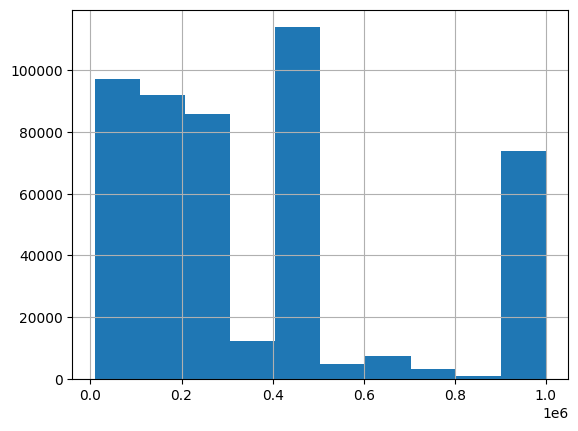

In [104]:
# hacemos un histograma
df[df["Census_SystemVolumeTotalCapacity"] < 1_000_000]["Census_SystemVolumeTotalCapacity"].hist()

In [105]:
# correlación con el target
df[["Census_SystemVolumeTotalCapacity", "HasDetections"]].corr()

Census_SystemVolumeTotalCapacity  \
Census_SystemVolumeTotalCapacity                            1.0000   
HasDetections                                               0.0137   

                                  HasDetections  
Census_SystemVolumeTotalCapacity         0.0137  
HasDetections                            1.0000

In [106]:
# mismo argumento que "Census_PrimaryDiskTotalCapacity", eliminamos la columna
del_columns.append("Census_SystemVolumeTotalCapacity")

### "Census_HasOpticalDiskDrive"
Descripción: Indica si el dispositivo tiene una unidad de disco óptico

In [107]:
df["Census_HasOpticalDiskDrive"].value_counts(dropna=False)

Census_HasOpticalDiskDrive
0    459692
1     38352
Name: count, dtype: int64

In [108]:
38_517 / 500_000  # 7.7% True

0.077034

In [109]:
# correlación con el target
df[["Census_HasOpticalDiskDrive", "HasDetections"]].corr()

Census_HasOpticalDiskDrive  HasDetections
Census_HasOpticalDiskDrive                      1.0000         0.0199
HasDetections                                   0.0199         1.0000

In [110]:
# TODO: Muy poca correlación, la dejamos pero la podríamos borrar perfectamente (dependerá de los resultados de los modelos)

### "Census_TotalPhysicalRAM"
Descripción: Cantidad de RAM física en MB

In [111]:
df["Census_TotalPhysicalRAM"].value_counts(dropna=False)

Census_TotalPhysicalRAM
4096.0000     227899
8192.0000     122853
2048.0000      61525
16384.0000     30014
6144.0000      22274
               ...  
3128.0000          1
6655.0000          1
1954.0000          1
3530.0000          1
4120.0000          1
Name: count, Length: 526, dtype: int64

In [112]:
#  pasamos a GB
df["Census_TotalPhysicalRAM"].apply(lambda x: x // 1024).value_counts().sort_index()

Census_TotalPhysicalRAM
0.0000          40
1.0000        4208
2.0000       61933
3.0000        8947
4.0000      227958
5.0000         479
6.0000       22315
7.0000         317
8.0000      122864
9.0000          38
10.0000        601
11.0000         33
12.0000       9061
13.0000          2
14.0000         91
15.0000         44
16.0000      30018
18.0000         28
19.0000          4
20.0000        234
21.0000          2
22.0000          5
23.0000          4
24.0000        684
26.0000          1
27.0000          1
28.0000         13
29.0000          1
30.0000          2
31.0000          4
32.0000       3194
35.0000          1
36.0000          7
40.0000         18
44.0000          3
48.0000         50
52.0000          2
56.0000          2
60.0000          1
64.0000        309
66.0000          1
69.0000          1
72.0000          4
95.0000          1
96.0000          3
112.0000         1
128.0000        43
149.0000         1
192.0000         1
256.0000         4
384.0000         1
Name: c

In [113]:
"""
Opciones:
1. Eliminar la columna por (alomejor) no tener relación con el target
2. Eliminamos los registros con valores "anormales" o "poco frecuentes"
3. Otra (a definir)
"""

# OPCIÓN 2!
# convertimos a GB
df["Census_TotalPhysicalRAM_GB"] = df["Census_TotalPhysicalRAM"].apply(lambda x: x // 1024)

In [114]:
# nulos
df["Census_TotalPhysicalRAM_GB"].isna().sum()  # 4556 nulos

4464

In [115]:
# Buscamos aquellos valores de RAM que tengan más de 1000 filas en caso de RAM < 20 GB y de más de 100 filas en caso de RAM >= 20 GB
recuento_RAM = df["Census_TotalPhysicalRAM_GB"].value_counts().sort_index()
a = recuento_RAM.iloc[:20][recuento_RAM.iloc[:20] > 1000] # RAM < 20 GB
b = recuento_RAM.iloc[20:][recuento_RAM.iloc[20:] > 100] # RAM >= 20 GB

In [116]:
ram_elecciones = a.index.tolist() + b.index.tolist()
ram_elecciones  # valores más frecuentes, nos quedamos con los registros que contenegan estos valores

[1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0, 16.0, 24.0, 32.0, 64.0]

In [117]:
# filtramos por los registros que tengan la RAM que hemos seleccionado
df = df[df["Census_TotalPhysicalRAM_GB"].isin(ram_elecciones)]  # indirecamente eliminamos los nulos

In [118]:
print(f"Recuento de registros actuales: {len(df)}")  # 493_254, 6746 menos
df["Census_TotalPhysicalRAM_GB"].value_counts()

Recuento de registros actuales: 491491


Census_TotalPhysicalRAM_GB
4.0000     227958
8.0000     122864
2.0000      61933
16.0000     30018
6.0000      22315
12.0000      9061
3.0000       8947
1.0000       4208
32.0000      3194
24.0000       684
64.0000       309
Name: count, dtype: int64

In [119]:
# Agrupamos los valores más pequeños
df['Census_TotalPhysicalRAM_GB'] = df['Census_TotalPhysicalRAM_GB'].apply(lambda x: "Other" if x not in list([4.0, 8.0]) else x)
df['Census_TotalPhysicalRAM_GB'] = df['Census_TotalPhysicalRAM_GB'].replace({4: 0, 8: 1, "Other": 2})

In [120]:
# correlación con el target
df[["Census_TotalPhysicalRAM_GB", "HasDetections"]].corr()

Census_TotalPhysicalRAM_GB  HasDetections
Census_TotalPhysicalRAM_GB                      1.0000        -0.0174
HasDetections                                  -0.0174         1.0000

In [121]:
del_columns.append("Census_TotalPhysicalRAM")

### "Census_ChassisTypeName"
Descripción: Tipo de chasis del dispositivo

In [122]:
df["Census_ChassisTypeName"].value_counts(dropna=False)

Census_ChassisTypeName
Notebook               291606
Desktop                102887
Laptop                  37942
Portable                20028
AllinOne                11324
MiniTower                4691
Convertible              4650
Other                    3135
Detachable               2911
LowProfileDesktop        2840
HandHeld                 2647
UNKNOWN                  2243
SpaceSaving              1662
Tablet                    725
Tower                     560
Unknown                   551
MainServerChassis         420
MiniPC                    255
LunchBox                  221
SubNotebook                45
BusExpansionChassis        38
RackMountChassis           36
NaN                        35
30                         11
StickPC                     7
0                           5
35                          3
PizzaBox                    3
MultisystemChassis          2
31                          2
SubChassis                  2
32                          1
ExpansionChassis 

In [123]:
# Convertir la variable string en variables dummy
df_dummies = pd.get_dummies(df['Census_ChassisTypeName'], prefix='Census_ChassisTypeName')

# Calcular la correlación de cada variable dummy con el target
correlations = df_dummies.corrwith(df['HasDetections'])

correlations

Census_ChassisTypeName_0                     -0.0006
Census_ChassisTypeName_25                    -0.0014
Census_ChassisTypeName_30                    -0.0022
Census_ChassisTypeName_31                     0.0020
Census_ChassisTypeName_32                     0.0014
Census_ChassisTypeName_35                    -0.0008
Census_ChassisTypeName_AllinOne               0.0034
Census_ChassisTypeName_Blade                 -0.0014
Census_ChassisTypeName_BusExpansionChassis   -0.0019
Census_ChassisTypeName_Convertible           -0.0039
Census_ChassisTypeName_Desktop                0.0255
Census_ChassisTypeName_Detachable            -0.0234
Census_ChassisTypeName_ExpansionChassis      -0.0014
Census_ChassisTypeName_HandHeld              -0.0302
Census_ChassisTypeName_Laptop                -0.0044
Census_ChassisTypeName_LowProfileDesktop      0.0021
Census_ChassisTypeName_LunchBox              -0.0017
Census_ChassisTypeName_MainServerChassis     -0.0050
Census_ChassisTypeName_MiniPC                -

In [124]:
# Correlaciones < 0.04 -> proponemos eliminar la columna
del_columns.append("Census_ChassisTypeName")

In [125]:
df.head(2)

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0            7.0000                 0   
1  4.18.1807.18075  1.273.1282.0       0            7.0000                 0   

   DefaultBrowsersIdentifier  ...  EngineVersion_trimmed  AppVersion_trimmed  \
0                        NaN  ...                  15100                  18   
1                        NaN  ...                  15100                  18   

   AvSigVersion_trimmed  Platform_windows10  Platform_windows7  \
0                   273                True              False   
1                   273                True              False   

   Platform_windows8  Census_PrimaryDiskTypeName_HDD  \
0              False                            True   
1              False                            True   

   Census_PrimaryDiskTypeName_Indefinido  Census_PrimaryDiskTypeName_SSD  \
0                                  False                           False   
1                                  False                           False   

   Census_TotalPhysicalRAM_GB  
0                           1  
1                           1  

[2 rows x 92 columns]

### "Census_InternalPrimaryDiagonalDisplaySizeInInches"
Descripción: Tamaño diagonal de la pantalla en pulgadas

In [126]:
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].value_counts(dropna=False)

Census_InternalPrimaryDiagonalDisplaySizeInInches
15.5000    169360
13.9000     52292
14.0000     30073
11.6000     17350
21.5000     15104
            ...  
69.3000         1
29.6000         1
85.8000         1
60.2000         1
95.4000         1
Name: count, Length: 512, dtype: int64

<Axes: >

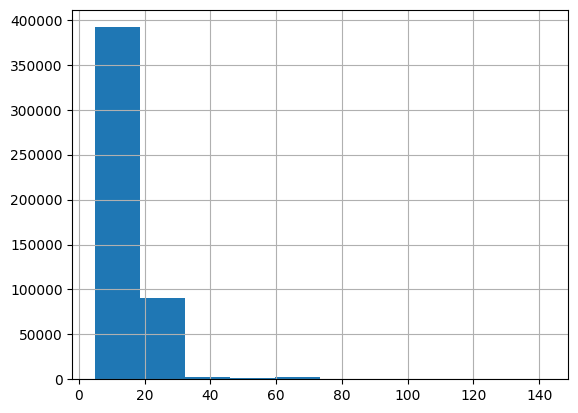

In [127]:
# hist
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].hist()

In [128]:
# se deduce una muy baja correlación con el target, eliminamos la columna  # TODO
del_columns.append("Census_InternalPrimaryDiagonalDisplaySizeInInches")

In [129]:
# correlación con el target
df[["Census_InternalPrimaryDiagonalDisplaySizeInInches", "HasDetections"]].corr()

Census_InternalPrimaryDiagonalDisplaySizeInInches  \
Census_InternalPrimaryDiagonalDisplaySizeInInches                                             1.0000   
HasDetections                                                                                 0.0334   

                                                   HasDetections  
Census_InternalPrimaryDiagonalDisplaySizeInInches         0.0334  
HasDetections                                             1.0000

### "Census_InternalPrimaryDisplayResolutionHorizontal" y "Census_InternalPrimaryDisplayResolutionVertical"
Descripción: Resolución de la pantalla

In [130]:
df["Census_InternalPrimaryDisplayResolutionHorizontal"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionHorizontal
1366.0000     249060
1920.0000     122787
1280.0000      29108
1600.0000      27791
1024.0000      18484
               ...  
5110.0000          1
1282.0000          1
1173.0000          1
3780.0000          1
10320.0000         1
Name: count, Length: 374, dtype: int64

In [131]:
df["Census_InternalPrimaryDisplayResolutionVertical"].value_counts(dropna=False)

Census_InternalPrimaryDisplayResolutionVertical
768.0000     273860
1080.0000    118997
900.0000      36251
800.0000      14531
1024.0000     10268
              ...  
1364.0000         1
739.0000          1
1326.0000         1
2220.0000         1
759.0000          1
Name: count, Length: 400, dtype: int64

In [132]:
# misma argumentación que "Census_InternalPrimaryDiagonalDisplaySizeInInches", proponemos eliminar las columnas
del_columns.append("Census_InternalPrimaryDisplayResolutionHorizontal")
del_columns.append("Census_InternalPrimaryDisplayResolutionVertical")

### "Census_PowerPlatformRoleName"
Descripción: Nombre del rol de la plataforma de energía

In [133]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)  # no tiene nulos

Census_PowerPlatformRoleName
Mobile               342396
Desktop              113022
Slate                 27331
Workstation            6036
SOHOServer             1999
UNKNOWN                 361
AppliancePC             212
EnterpriseServer        131
PerformanceServer         3
Name: count, dtype: int64

In [134]:
# juntamos columnas [SOHOServer, EnterpriseServer, PerformanceServer] en "Server"
df["Census_PowerPlatformRoleName"] = df["Census_PowerPlatformRoleName"].replace(["SOHOServer", "EnterpriseServer", "PerformanceServer"], "Server")

In [135]:
# borramos registros con nulos (con valor UNKNOWN)
df = df[df["Census_PowerPlatformRoleName"] != "UNKNOWN"]

In [136]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)

Census_PowerPlatformRoleName
Mobile         342396
Desktop        113022
Slate           27331
Workstation      6036
Server           2133
AppliancePC       212
Name: count, dtype: int64

In [137]:
df["Census_PowerPlatformRoleName"] = df["Census_PowerPlatformRoleName"].replace({"Slate": "Mobile", "Workstation": "Desktop", "Server": "Desktop", "AppliancePC": "Desktop"})

In [138]:
df['Census_PowerPlatformRoleName'] = df['Census_PowerPlatformRoleName'].replace({"Mobile": 0, "Desktop": 1})

### "Census_InternalBatteryType"
Descripción: Tipo de batería interna

In [139]:
df["Census_InternalBatteryType"].value_counts(dropna=False)

Census_InternalBatteryType
NaN     348469
lion    112321
li-i     13737
#         9904
lip       3302
liio      1771
li p       460
li         348
nimh       267
real       162
bq20       142
pbac       128
lgi0        29
unkn        19
lipo        13
lhp0        12
vbox        11
ithi         7
4cel         6
ram          5
batt         3
bad          3
lipp         3
a132         2
virt         2
li-l         1
lgl0         1
icp3         1
3ion         1
Name: count, dtype: int64

In [140]:
# interpeteción: hay 348_471 nulos y se puede presuponer una alta correlación entre el tipo de batería y el tipo de dispositivo -> eliminamos la columna #TODO: comprobar
del_columns.append("Census_InternalBatteryType")

### "Census_InternalBatteryNumberOfCharges"
Descripción: Número de cargas de la batería interna

In [141]:
df["Census_InternalBatteryNumberOfCharges"].value_counts(dropna=False)

Census_InternalBatteryNumberOfCharges
0.0000             280522
4294967295.0000    123590
NaN                 12204
1.0000               2926
2.0000               1488
                    ...  
33134.0000              1
1182.0000               1
53770.0000              1
10658.0000              1
1900.0000               1
Name: count, Length: 5233, dtype: int64

In [142]:
# 1. se presupone que serà una variable contínua
# 2. nulos: hay directamente 12204 NaNs (2.5%) pero se observa unos registros extremadamente altos de 4294967295 y 4294967294. Estos valores provienen de un error en la recogida de datos, 4294967295 es el valor máximo de un entero de 32 bits (2^32 - 1). Hay 123_658 y 656 registros respectivamente (24.9% y 0.1%). Demasiados registros para eliminarlos, se propone rellenar los nulos con la media de la columna.

# TODO: exponer al grupo
# calculamos media evitando los valores erróneos

df["Census_InternalBatteryNumberOfCharges"] = df["Census_InternalBatteryNumberOfCharges"].fillna(0)

In [143]:
# vamos los registros fallidos
df[df["Census_InternalBatteryNumberOfCharges"] > 4_000_000_000]
# observamos que los registros con valor 4294967295 son los que tienen nulos en la columna "Census_InternalBatteryType" -> comportamiento esperado

Unnamed: 0                 MachineIdentifier   ProductName  \
0          8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   
10          844555  1843aa258152c018f0298a8ba9915ebd  win8defender   
12         2382707  4458ad1edb42d5f05ac868afa37f628e  win8defender   
16         5951649  aad1e798db865780f340539c0429934d  win8defender   
19         2797061  503ff9f5e17315afd880eb6745316439  win8defender   
...            ...                               ...           ...   
499979     5253164  96c417e49191b49f11c51314fe27e5c4  win8defender   
499988      959036  1b8d39b74872ef5de9f9c9ca43424d79  win8defender   
499994     5802201  a687cfd1252ee03ce9658eaf15bdf40e  win8defender   
499997     8819786  fd16cd542d660848d272e4552bcccb1e  win8defender   
499999     4295573  7b45dc3537e17f16305c5983ca0a1cb9  win8defender   

       EngineVersion       AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
0        1.1.15100.1  4.18.1807.18075  1.273.1234.0       0            7.0000   
10       1.1.15100.1  4.18.1807.18075  1.273.1552.0       0            7.0000   
12       1.1.15100.1  4.18.1807.18075  1.273.1112.0       0            7.0000   
16       1.1.15100.1  4.18.1806.18062   1.273.356.0       0            7.0000   
19       1.1.15200.1  4.18.1807.18075   1.275.948.0       0            7.0000   
...              ...              ...           ...     ...               ...   
499979   1.1.15200.1  4.18.1807.18075  1.275.1140.0       0            7.0000   
499988   1.1.15200.1  4.18.1807.18075   1.275.260.0       0            7.0000   
499994   1.1.15200.1   4.9.10586.1106   1.275.155.0       0            7.0000   
499997   1.1.15300.5   4.13.17134.112  1.275.1343.0       0            7.0000   
499999   1.1.15100.1  4.18.1807.18075  1.273.1644.0       0            7.0000   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
0                      0                        NaN  ...   
10                     0                        NaN  ...   
12                     0                        NaN  ...   
16                     0                        NaN  ...   
19                     0                        NaN  ...   
...                  ...                        ...  ...   
499979                 0                        NaN  ...   
499988                 0                        NaN  ...   
499994                 0                  2132.0000  ...   
499997                 0                        NaN  ...   
499999                 0                        NaN  ...   

        EngineVersion_trimmed  AppVersion_trimmed  AvSigVersion_trimmed  \
0                       15100                  18                   273   
10                      15100                  18                   273   
12                      15100                  18                   273   
16                      15100                  18                   273   
19                      15200                  18                   275   
...                       ...                 ...                   ...   
499979                  15200                  18                   275   
499988                  15200                  18                   275   
499994                  15200                   9                   275   
499997                  15300                  13                   275   
499999                  15100                  18                   273   

        Platform_windows10  Platform_windows7  Platform_windows8  \
0                     True              False              False   
10                    True              False              False   
12                    True              False              False   
16                    True              False              False   
19                    True              False              False   
...                    ...                ...                ...   
499979                True              False              False   
499988                True  

In [144]:
# se imputan los valores erróneos con la media
mask = df["Census_InternalBatteryNumberOfCharges"] > 4_000_000_000
df.loc[mask, "Census_InternalBatteryNumberOfCharges"] = 0

<Axes: >

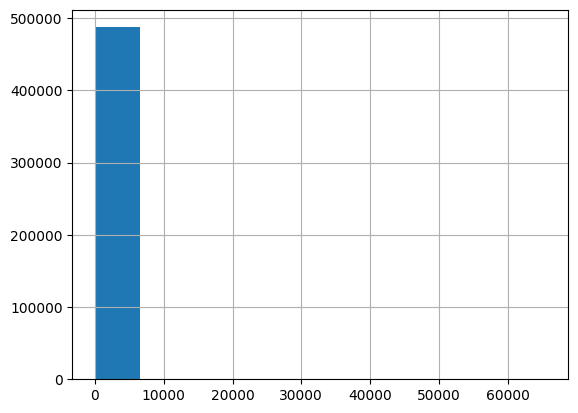

In [145]:
# hist
df["Census_InternalBatteryNumberOfCharges"].hist()

In [146]:
df['Census_InternalBatteryNumberOfCharges'].value_counts(dropna=False)

Census_InternalBatteryNumberOfCharges
0.0000        416972
1.0000          2926
2.0000          1488
16.0000         1487
3.0000          1208
               ...  
8331.0000          1
57727.0000         1
1030.0000          1
43544.0000         1
1900.0000          1
Name: count, Length: 5230, dtype: int64

In [147]:
# miramos registros con valor 0
df[df["Census_InternalBatteryNumberOfCharges"] == 0]

Unnamed: 0                 MachineIdentifier   ProductName  \
0          8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   
1          8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   
2          2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   
4           236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   
5          3771983  6c3ff3036d3ecc96729a615653742608  win8defender   
...            ...                               ...           ...   
499995     5826339  a739cacc292f3f1e745827c1ca6c6ada  win8defender   
499996     5740034  a4c232d528d98343e8f1b73650da7b82  win8defender   
499997     8819786  fd16cd542d660848d272e4552bcccb1e  win8defender   
499998     8713685  fa0841f8f6147de7c3d287e05270ed42  win8defender   
499999     4295573  7b45dc3537e17f16305c5983ca0a1cb9  win8defender   

       EngineVersion        AppVersion  AvSigVersion  IsBeta  \
0        1.1.15100.1   4.18.1807.18075  1.273.1234.0       0   
1        1.1.15100.1   4.18.1807.18075  1.273.1282.0       0   
2        1.1.15100.1    4.9.10586.1106   1.273.781.0       0   
4        1.1.15200.1   4.18.1807.18075   1.275.511.0       0   
5        1.1.15200.1   4.18.1807.18075   1.275.981.0       0   
...              ...               ...           ...     ...   
499995   1.1.15200.1   4.18.1807.18075  1.275.1090.0       0   
499996   1.1.15100.1   4.18.1807.18075  1.273.1620.0       0   
499997   1.1.15300.5    4.13.17134.112  1.275.1343.0       0   
499998   1.1.15100.1  4.14.17639.18041   1.273.483.0       0   
499999   1.1.15100.1   4.18.1807.18075  1.273.1644.0       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  ...  \
0                 7.0000                 0                        NaN  ...   
1                 7.0000                 0                        NaN  ...   
2                 7.0000                 0                        NaN  ...   
4                 7.0000                 0                        NaN  ...   
5                 7.0000                 0                        NaN  ...   
...                  ...               ...                        ...  ...   
499995            7.0000                 0                        NaN  ...   
499996            7.0000                 0                        NaN  ...   
499997            7.0000                 0                        NaN  ...   
499998            7.0000                 0                        NaN  ...   
499999            7.0000                 0                        NaN  ...   

        EngineVersion_trimmed  AppVersion_trimmed  AvSigVersion_trimmed  \
0                       15100                  18                   273   
1                       15100                  18                   273   
2                       15100                   9                   273   
4                       15200                  18                   275   
5                       15200                  18                   275   
...                       ...                 ...                   ...   
499995                  15200                  18                   275   
499996                  15100                  18                   273   
499997                  15300                  13                   275   
499998                  15100                  14                   273   
499999                  15100                  18                   273   

        Platform_windows10  Platform_windows7  Platform_windows8  \
0                     True              False              False   
1                     True              False              False   
2                     True              False              False   
4                     True              False              False   
5                     True              False              False   
...                    ...                ...                ...   
499995                True              False              False   
499996          

In [148]:
# correlación con el target
df[["Census_InternalBatteryNumberOfCharges", "HasDetections"]].corr()

Census_InternalBatteryNumberOfCharges  \
Census_InternalBatteryNumberOfCharges                                 1.0000   
HasDetections                                                        -0.0220   

                                       HasDetections  
Census_InternalBatteryNumberOfCharges        -0.0220  
HasDetections                                 1.0000

In [149]:
# es una columna que indirectamente nos puede estar devolviendo en tiempo de uso del dispositivo, proponemos mantenerla aún habiendo 280_000 registros con valor 0 (56%). Es la única que nos proporciona esta información. # TODO: debatir mas a fondo

In [150]:
del_columns.append("Census_InternalBatteryNumberOfCharges")

### "Census_OSVersion"
Descripción: Versión del sistema operativo

In [151]:
print(f"{df['Census_OSVersion'].isna().sum()=}")  # 0 nulos
df["Census_OSVersion"].value_counts(dropna=False)
# Únicamente hay un registro con la versión distinta a la 10.0... siendo la 6.3.9600.19069

df['Census_OSVersion'].isna().sum()=0


Census_OSVersion
10.0.17134.228      79211
10.0.17134.165      50065
10.0.16299.431      30110
10.0.17134.285      26034
10.0.17134.112      19314
                    ...  
10.0.10240.16566        1
10.0.15019.1000         1
10.0.14328.1000         1
10.0.10586.601          1
10.0.15048.0            1
Name: count, Length: 301, dtype: int64

In [152]:
df[df['OsVer'] == '6.3.0.0'][['OsVer', 'Census_OSVersion']]

OsVer Census_OSVersion
87      6.3.0.0  10.0.14393.1480
209     6.3.0.0   10.0.10586.545
390     6.3.0.0  10.0.10586.1176
404     6.3.0.0   10.0.10586.420
456     6.3.0.0    10.0.17134.48
...         ...              ...
499630  6.3.0.0   10.0.10586.164
499640  6.3.0.0   10.0.16299.309
499736  6.3.0.0   10.0.10586.420
499807  6.3.0.0   10.0.14393.222
499851  6.3.0.0   10.0.14393.693

[10554 rows x 2 columns]

In [153]:
# se podía esperar una fueran la misma columna, pero este ejemplo nos demuestra que no es así
# siendo todos los valores 10.0... podemos prononer a lo sumo quedarnos con "el tercer valor" de la versión que podría estar relacionado con parches de seguridad (p.e.) # TODO: Exponer el caso
# #TODO: Propongo que los valores "muy manipulados" empiecen por CALC_

# evitamos el caso del registro 6.3.9600.19069 eliminándolo
df = df[df['Census_OSVersion'] != '6.3.9600.19069']
df["CALC_Census_OSVersion"] = df["Census_OSVersion"].apply(lambda x: x.split(".")[2])

In [154]:
# eliminamos la columna original
del_columns.append("Census_OSVersion")

In [155]:
df["CALC_Census_OSVersion"].value_counts(dropna=False)

CALC_Census_OSVersion
17134    223579
16299    133412
15063     43442
14393     42439
10586     32442
10240     14656
17738       162
17692       146
17744       133
17758        97
17746        65
17763        58
17754        56
17751        54
17741        44
17755        40
17735        36
17686        33
17733        31
17760        30
17133        21
17682        18
17677        17
17672        14
18237        14
18242        13
18234        13
17661         9
17713         8
17666         7
17634         4
17747         3
17639         3
17730         2
17650         2
14986         2
17655         2
14926         1
17749         1
14971         1
17723         1
17623         1
16193         1
18219         1
14295         1
17004         1
14421         1
17604         1
17618         1
11082         1
17046         1
14328         1
15019         1
16251         1
14946         1
17074         1
17753         1
15042         1
15048         1
Name: count, dtype: int64

### "Census_OSArchitecture"
Descripción: Arquitectura del sistema operativo

In [156]:
df["Census_OSArchitecture"].value_counts(dropna=False)  # dos valores únicos (amd64 y x86) y sin nulos

Census_OSArchitecture
amd64    446175
x86       44954
Name: count, dtype: int64

In [157]:
# comprobamos correlación con la columna processor_x64 y processor_x86
df[df["Processor"] == True]["Census_OSArchitecture"].value_counts()  # coincide en un 446_028/(446_028+452) = 99.9%

Census_OSArchitecture
x86      44506
amd64      459
Name: count, dtype: int64

In [158]:
df[df["Processor"] == True]["Census_OSArchitecture"].value_counts()  # coincide en un 44555/(44555+459) = 99.9%

Census_OSArchitecture
x86      44506
amd64      459
Name: count, dtype: int64

In [159]:
# TODO: puesto que esta columna no es nada conlfictiva, tengo que preguntar que tal se comportó la otra columna (processor) preguntar a fran
# eliminamos la columna por ser redundante
del_columns.append("Census_OSArchitecture")

### "Census_OSBranch"
Descripción: Rama del sistema operativo

In [160]:
df["Census_OSBranch"].value_counts(dropna=False)

Census_OSBranch
rs4_release                  223601
rs3_release                   67238
rs3_release_svc_escrow        65858
rs2_release                   43444
rs1_release                   42442
th2_release                   17856
th2_release_sec               14586
th1_st1                       10483
th1                            4173
rs5_release                     819
rs3_release_svc_escrow_im       316
rs_prerelease                   178
rs_prerelease_flt               132
rs5_release_sigma                 3
Name: count, dtype: int64

In [161]:
print(f"{df['Census_OSBranch'].isna().sum()=}")  # 0 nulos

df['Census_OSBranch'].isna().sum()=0


In [162]:
# viendo los valores únicos y su estructura, proponemos quedarnos con las 3 primeras letras de cada valor que parecen contener la información más relevante
df["CALC_Census_OSBranch"] = df["Census_OSBranch"].apply(lambda x: x[:3])

In [163]:
df["CALC_Census_OSBranch"].value_counts(dropna=False)

CALC_Census_OSBranch
rs4    223601
rs3    133412
rs2     43444
rs1     42442
th2     32442
th1     14656
rs5       822
rs_       310
Name: count, dtype: int64

In [164]:
# modificamos el valor menos frecuente ("rs_") a "rs"
df["CALC_Census_OSBranch"] = df["CALC_Census_OSBranch"].replace("rs_", "rs")  # TODO: hacer el split por _ DEBERES

In [165]:
# eliminamos la columna original
del_columns.append("Census_OSBranch")

In [166]:
df["CALC_Census_OSBranch"].value_counts(dropna=False)

CALC_Census_OSBranch
rs4    223601
rs3    133412
rs2     43444
rs1     42442
th2     32442
th1     14656
rs5       822
rs        310
Name: count, dtype: int64

In [167]:
# 8 valores únicos de una variable categórica -> OHE
df = pd.get_dummies(df, columns=["CALC_Census_OSBranch"], prefix="CALC_Census_OSBranch")  # TODO

### "Census_OSBuildNumber"
Descripción: Número de compilación del sistema operativo

In [168]:
print(f"{df['Census_OSBuildNumber'].isna().sum()=}")  # 0 nulos
df["Census_OSBuildNumber"].value_counts(dropna=False)

df['Census_OSBuildNumber'].isna().sum()=0


Census_OSBuildNumber
17134    223579
16299    133412
15063     43442
14393     42439
10586     32442
10240     14656
17738       162
17692       146
17744       133
17758        97
17746        65
17763        58
17754        56
17751        54
17741        44
17755        40
17735        36
17686        33
17733        31
17760        30
17133        21
17682        18
17677        17
17672        14
18237        14
18242        13
18234        13
17661         9
17713         8
17666         7
17634         4
17747         3
17639         3
17730         2
17650         2
14986         2
17655         2
14926         1
17749         1
14971         1
17723         1
17623         1
16193         1
18219         1
14295         1
17004         1
14421         1
17604         1
17618         1
11082         1
17046         1
14328         1
15019         1
16251         1
14946         1
17074         1
17753         1
15042         1
15048         1
Name: count, dtype: int64

In [169]:
df[['CALC_Census_OSVersion', 'Census_OSBuildNumber']].dtypes

CALC_Census_OSVersion    object
Census_OSBuildNumber      int64
dtype: object

In [170]:
df[['CALC_Census_OSVersion', 'Census_OSBuildNumber']]

CALC_Census_OSVersion  Census_OSBuildNumber
0                      17134                 17134
1                      17134                 17134
2                      10586                 10586
3                      17134                 17134
4                      17134                 17134
...                      ...                   ...
499995                 16299                 16299
499996                 16299                 16299
499997                 17134                 17134
499998                 16299                 16299
499999                 17134                 17134

[491129 rows x 2 columns]

In [171]:
# viendo que la columna préviamente creada "CALC_Census_OSVersion" contiene la misma información que "Census_OSBuildNumber", eliminamos la columna
del_columns.append("CALC_Census_OSVersion") # TODO: pedir al grupo si mantener el código aún sabiendo que es redundante

### "Census_OSBuildRevision"
Descripción: Revisión de la compilación del sistema operativo

In [172]:
print(f"{df['Census_OSBuildRevision'].isna().sum()=}")  # 0 nulos
df["Census_OSBuildRevision"].value_counts(dropna=False)

df['Census_OSBuildRevision'].isna().sum()=0


Census_OSBuildRevision
228      79211
165      50065
431      30110
285      26034
112      19316
         ...  
491          1
17643        1
16389        1
2156         1
1670         1
Name: count, Length: 238, dtype: int64

In [173]:
df.head(2)

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0            7.0000                 0   
1  4.18.1807.18075  1.273.1282.0       0            7.0000                 0   

   DefaultBrowsersIdentifier  ...  Census_TotalPhysicalRAM_GB  \
0                        NaN  ...                           1   
1                        NaN  ...                           1   

   CALC_Census_OSVersion  CALC_Census_OSBranch_rs  CALC_Census_OSBranch_rs1  \
0                  17134                    False                     False   
1                  17134                    False                     False   

   CALC_Census_OSBranch_rs2  CALC_Census_OSBranch_rs3  \
0                     False                     False   
1                     False                     False   

   CALC_Census_OSBranch_rs4  CALC_Census_OSBranch_rs5  \
0                      True                     False   
1                      True                     False   

   CALC_Census_OSBranch_th1  CALC_Census_OSBranch_th2  
0                     False                     False  
1                     False                     False  

[2 rows x 101 columns]

In [174]:
# se observa que Census_OSVersion se construye a partir de Census_OSBuildNumber y Census_OSBuildRevision, eliminamos la columna
# proponemos eliminar la columna Census_OSVersion (ya insertada en del_columns) porque es un str y las otras dos columnas son numéricas

In [175]:
del_columns.append("Census_OSBuildRevision")

### "Census_OSEdition"
Descripción: Edición del sistema operativo

In [176]:
print(f"{df['Census_OSEdition'].isna().sum()=}")  # 0 nulos
df["Census_OSEdition"].value_counts(dropna=False)

df['Census_OSEdition'].isna().sum()=0


Census_OSEdition
Core                        192290
Professional                171597
CoreSingleLanguage          107431
CoreCountrySpecific           9150
ProfessionalEducation         3071
Education                     2262
Enterprise                    1987
ProfessionalN                 1553
EnterpriseS                   1072
Cloud                          326
CoreN                          240
EducationN                      60
EnterpriseSN                    45
EnterpriseN                     27
ProfessionalEducationN          12
ServerStandard                   2
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: count, dtype: int64

In [177]:
# hay 3 valores muy predominantes con 192000, 171000 y 107000 registros respectivamente (38.9%, 34.7% y 21.7%). Se propone agrupar los 16 valores restantes en un solo valor "Otro" y posteriormente hacer un OHE
# agrupamos los valores menos frecuentes
df["Census_OSEdition"] = df["Census_OSEdition"].replace(df["Census_OSEdition"].value_counts().index[3:], "Otro")

In [178]:
df["Census_OSEdition"].value_counts(dropna=False)

Census_OSEdition
Core                  192290
Professional          171597
CoreSingleLanguage    107431
Otro                   19811
Name: count, dtype: int64

In [179]:
# la columna otros contiene 19827 registros (4%)
# OHE
df = pd.get_dummies(df, columns=["Census_OSEdition"], prefix="Census_OSEdition")  # TODO

### "Census_OSSkuName"
Descripción: Nombre de la versión del sistema operativo

In [180]:
print(f"{df['Census_OSSkuName'].isna().sum()=}")  # 0 nulos
df["Census_OSSkuName"].value_counts(dropna=False)

df['Census_OSSkuName'].isna().sum()=0


Census_OSSkuName
CORE                    192285
PROFESSIONAL            174705
CORE_SINGLELANGUAGE     107409
CORE_COUNTRYSPECIFIC      9133
EDUCATION                 2265
ENTERPRISE                1996
PROFESSIONAL_N            1563
ENTERPRISE_S              1071
CLOUD                      322
CORE_N                     240
EDUCATION_N                 60
ENTERPRISE_S_N              46
ENTERPRISE_N                27
STANDARD_SERVER              2
PRO_WORKSTATION              2
CLOUDN                       1
PRO_WORKSTATION_N            1
UNLICENSED                   1
Name: count, dtype: int64

In [181]:
# es un atributo prácticamente idéntico a Census_OSEdition, eliminamos la columna
del_columns.append("Census_OSSkuName")

### "Census_OSInstallTypeName"
Descripción: Método de instalación del sistema operativo

In [182]:
print(f"{df['Census_OSInstallTypeName'].isna().sum()=}")  # 0 nulos
df["Census_OSInstallTypeName"].value_counts(dropna=False)

df['Census_OSInstallTypeName'].isna().sum()=0


Census_OSInstallTypeName
UUPUpgrade        145648
IBSClean           88462
Update             87884
Upgrade            69228
Other              46079
Reset              35985
Refresh            11109
Clean               3842
CleanPCRefresh      2892
Name: count, dtype: int64

In [183]:
# puede parecer difícilmente relacionable con el target, comprobamos correlaciones
df_dummies = pd.get_dummies(df['Census_OSInstallTypeName'], prefix='Census_OSInstallTypeName')
correlations = df_dummies.corrwith(df['HasDetections'])
correlations

Census_OSInstallTypeName_Clean             0.0037
Census_OSInstallTypeName_CleanPCRefresh   -0.0057
Census_OSInstallTypeName_IBSClean          0.0231
Census_OSInstallTypeName_Other            -0.0152
Census_OSInstallTypeName_Refresh          -0.0113
Census_OSInstallTypeName_Reset            -0.0105
Census_OSInstallTypeName_UUPUpgrade        0.0332
Census_OSInstallTypeName_Update           -0.0209
Census_OSInstallTypeName_Upgrade          -0.0204
dtype: float64

In [184]:
# correlaciones no superiores al 0.04 -> eliminamos la columna
del_columns.append("Census_OSInstallTypeName")

In [185]:
df['Census_FirmwareManufacturerIdentifier'].value_counts().sort_values(ascending=False).index[:6].to_list()

[142.0, 628.0, 554.0, 355.0, 556.0, 500.0]

In [186]:
df['Census_FirmwareVersionIdentifier'].value_counts().sort_values(ascending=False)

Census_FirmwareVersionIdentifier
33105.0000    5017
33111.0000    3338
33054.0000    3109
33108.0000    3048
63175.0000    2953
              ... 
16331.0000       1
48387.0000       1
68817.0000       1
49471.0000       1
54497.0000       1
Name: count, Length: 23350, dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491129 entries, 0 to 499999
Columns: 104 entries, Unnamed: 0 to Census_OSEdition_Professional
dtypes: bool(18), float64(36), int64(21), object(29)
memory usage: 334.4+ MB


## Parte IGNACIO

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491129 entries, 0 to 499999
Columns: 104 entries, Unnamed: 0 to Census_OSEdition_Professional
dtypes: bool(18), float64(36), int64(21), object(29)
memory usage: 334.4+ MB


In [189]:
valores_faltantes = (df.isnull().mean() * 100).sort_values(ascending=False)
print(valores_faltantes)

PuaMode                         99.9752
Census_ProcessorClass           99.5856
DefaultBrowsersIdentifier       95.2273
Census_IsFlightingInternal      82.9827
Census_InternalBatteryType      70.9526
                                  ...  
Census_TotalPhysicalRAM          0.0000
Census_HasOpticalDiskDrive       0.0000
Census_DeviceFamily              0.0000
Census_MDC2FormFactor            0.0000
Census_OSEdition_Professional    0.0000
Length: 104, dtype: float64


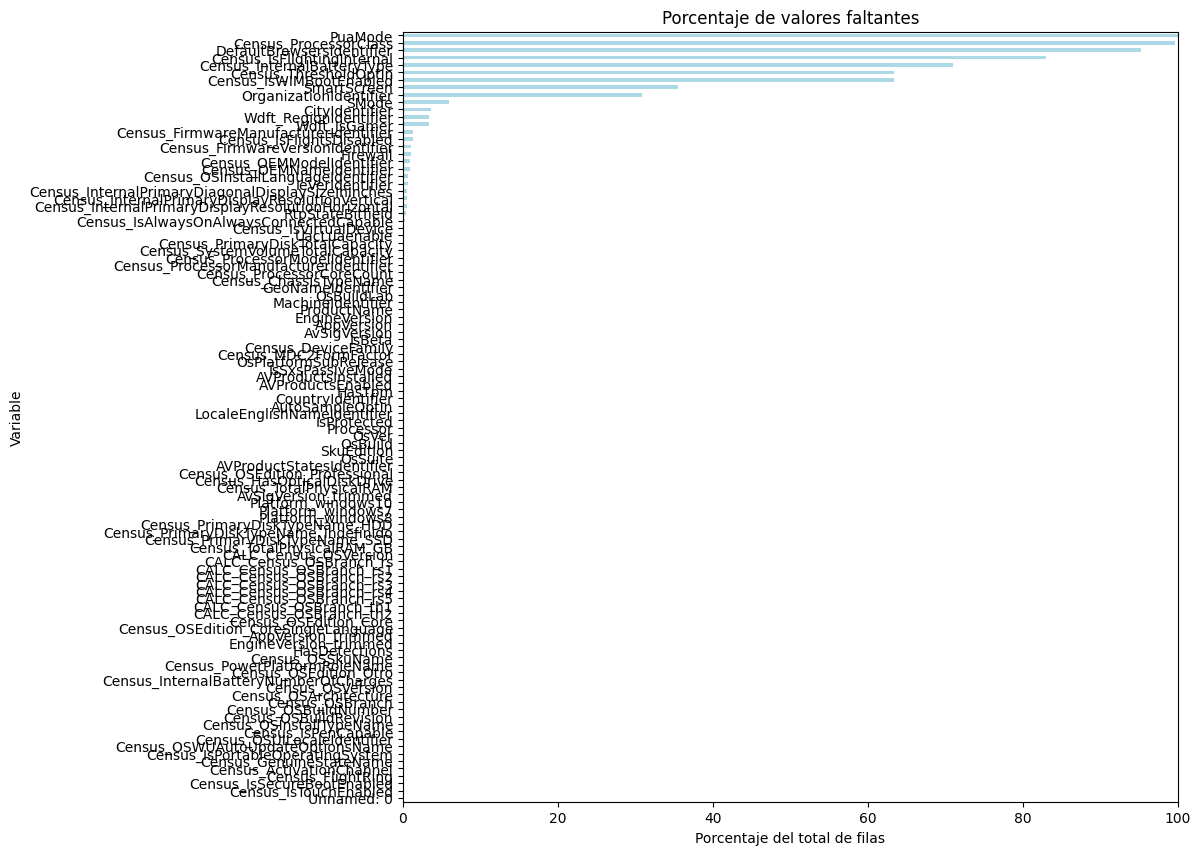

In [190]:
((df.isna().sum()/df.shape[0])*100).sort_values().plot(kind="barh",figsize=(10,10),color="lightblue")
plt.title('Porcentaje de valores faltantes')
plt.xlabel('Porcentaje del total de filas')
plt.ylabel('Variable')
plt.xlim(0, 100)
plt.show() 

In [191]:
df = df.drop(columns=['PuaMode', 'SMode', 'SmartScreen', 'OsBuild', 'OsPlatformSubRelease', 'OsBuildLab', 'AutoSampleOptIn', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_OEMModelIdentifier'])

In [192]:
columnas_objetivo_ict = ['Census_OEMNameIdentifier','Firewall','IeVerIdentifier','Census_ProcessorModelIdentifier','Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier','IsProtected','UacLuaenable']
df = df.dropna(subset=columnas_objetivo_ict)

df = df[~df["UacLuaenable"].isin(list([48.0, 6357062.0000, 2.0]))]
df = df[df['Census_ProcessorManufacturerIdentifier'] != 3.0]

In [193]:
df["OsVer"].value_counts()

OsVer
10.0.0.0      466793
6.3.0.0        10410
6.1.1.0          795
10.0.3.0          11
10.0.1.0           7
6.1.0.0            3
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: count, dtype: int64

In [194]:
df['OsVer'] = df['OsVer'].apply(lambda x: x.split('.')[0])

In [195]:
df["OsVer"].value_counts()

OsVer
10    466823
6      11215
Name: count, dtype: int64

In [196]:
df["OsVer"] = pd.to_numeric(df["OsVer"], errors="coerce").replace({10: 0, 6: 1})

In [197]:
df['OsSuite'].value_counts()

OsSuite
768    301672
256    176356
784        10
Name: count, dtype: int64

In [198]:
df = df[df['OsSuite'] != 784]

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478028 entries, 0 to 499999
Data columns (total 94 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         478028 non-null  int64  
 1   MachineIdentifier                                  478028 non-null  object 
 2   ProductName                                        478028 non-null  object 
 3   EngineVersion                                      478028 non-null  object 
 4   AppVersion                                         478028 non-null  object 
 5   AvSigVersion                                       478028 non-null  object 
 6   IsBeta                                             478028 non-null  int64  
 7   RtpStateBitfield                                   476304 non-null  float64
 8   IsSxsPassiveMode                                   478028 non-null  int64  
 9 

## Parte ALVARO

In [200]:
df[alvaro_columns].isna().sum()

Census_OSInstallLanguageIdentifier           2971
Census_OSUILocaleIdentifier                     0
Census_OSWUAutoUpdateOptionsName                0
Census_IsPortableOperatingSystem                0
Census_GenuineStateName                         0
Census_ActivationChannel                        0
Census_IsFlightingInternal                 397149
Census_IsFlightsDisabled                     4105
Census_FlightRing                               0
Census_ThresholdOptIn                      304621
Census_FirmwareManufacturerIdentifier        4506
Census_FirmwareVersionIdentifier             3229
Census_IsSecureBootEnabled                      0
Census_IsWIMBootEnabled                    304205
Census_IsVirtualDevice                        859
Census_IsTouchEnabled                           0
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable      1197
Wdft_IsGamer                                16008
Wdft_RegionIdentifier                       16008


---
### Census_IsFlightingInternal, Census_ThresholdOptIn y Census_IsWIMBootEnabled.

##### Primero quiero visualizar el porcentaje de valores nulos por columna

In [201]:

(df[alvaro_columns].isnull().sum() / len(df[alvaro_columns])) * 100


Census_OSInstallLanguageIdentifier         0.6215
Census_OSUILocaleIdentifier                0.0000
Census_OSWUAutoUpdateOptionsName           0.0000
Census_IsPortableOperatingSystem           0.0000
Census_GenuineStateName                    0.0000
Census_ActivationChannel                   0.0000
Census_IsFlightingInternal                83.0807
Census_IsFlightsDisabled                   0.8587
Census_FlightRing                          0.0000
Census_ThresholdOptIn                     63.7245
Census_FirmwareManufacturerIdentifier      0.9426
Census_FirmwareVersionIdentifier           0.6755
Census_IsSecureBootEnabled                 0.0000
Census_IsWIMBootEnabled                   63.6375
Census_IsVirtualDevice                     0.1797
Census_IsTouchEnabled                      0.0000
Census_IsPenCapable                        0.0000
Census_IsAlwaysOnAlwaysConnectedCapable    0.2504
Wdft_IsGamer                               3.3488
Wdft_RegionIdentifier                      3.3488


#####  Lo primero que estoy viendo es que hay columnas con un 50% de nulos, estas son `Census_IsFlightingInternal`, `Census_ThresholdOptIn` y `Census_IsWIMBootEnabled`.
#####  Por lo tanto voy a proceder a prescindir de estas.

In [202]:
del_columns.extend(["Census_IsFlightingInternal", "Census_ThresholdOptIn", "Census_IsWIMBootEnabled"])

---
### Census_OSInstallLanguageIdentifier

In [203]:
df["Census_OSInstallLanguageIdentifier"].value_counts()

Census_OSInstallLanguageIdentifier
8.0000     170808
9.0000      55385
7.0000      27834
29.0000     26176
14.0000     23089
37.0000     21506
10.0000     19746
26.0000     17468
5.0000      13302
35.0000     11031
39.0000     10753
18.0000     10065
20.0000      9180
24.0000      7751
25.0000      7156
27.0000      5776
19.0000      4507
17.0000      4496
1.0000       4379
3.0000       3874
6.0000       2765
33.0000      2693
15.0000      2205
4.0000       1925
30.0000      1726
23.0000      1581
31.0000      1171
12.0000      1073
2.0000       1053
16.0000       817
36.0000       814
28.0000       688
34.0000       562
13.0000       554
21.0000       389
32.0000       236
11.0000       186
38.0000       169
22.0000       168
Name: count, dtype: int64

Vamos a ver que grado de correlacion tiene con el target y asi saber si podemos descartarla con seguridad.

In [204]:
df[["Census_OSInstallLanguageIdentifier", "HasDetections"]].corr()

Census_OSInstallLanguageIdentifier  \
Census_OSInstallLanguageIdentifier                              1.0000   
HasDetections                                                   0.0035   

                                    HasDetections  
Census_OSInstallLanguageIdentifier         0.0035  
HasDetections                              1.0000

##### Podemos ver que la correlacion es de menos de un 0.001%, por lo tanto es seguro descartarla.

In [205]:
del_columns.append('Census_OSInstallLanguageIdentifier')

---
### Census_OSUILocaleIdentifier

In [206]:
df["Census_OSUILocaleIdentifier"].value_counts()

Census_OSUILocaleIdentifier
31     170306
34      55648
30      27863
125     26485
49      23299
        ...  
89          1
22          1
6           1
71          1
141         1
Name: count, Length: 89, dtype: int64

En base de la correlacion que mantenga con el target, decidiremos si prescindimos de esta columna o no.

In [207]:
df[["Census_OSUILocaleIdentifier", "HasDetections"]].corr()

Census_OSUILocaleIdentifier  HasDetections
Census_OSUILocaleIdentifier                       1.0000         0.0026
HasDetections                                     0.0026         1.0000

##### Al igual que con la anterior columna, no llega ni al 1% de correlacion, por lo tanto vamos a eliminar esta columna.

In [208]:
del_columns.append('Census_OSUILocaleIdentifier')

---
### Census_OSWUAutoUpdateOptionsName

In [209]:
df["Census_OSWUAutoUpdateOptionsName"].value_counts()

Census_OSWUAutoUpdateOptionsName
FullAuto                                 211736
UNKNOWN                                  134676
Notify                                   110133
AutoInstallAndRebootAtMaintenanceTime     20086
Off                                        1397
Name: count, dtype: int64

Esta columna tiene mas sentido mantenerla por que no tiene muchos valores y tiene mas sentido que algo relacionado con actualizaciones del OS tenga relacion con el target. A pesar de que tenemos aproximadamente un 25% de valores con `UNKNOWN` veremos que pasa en los tests y en funcion de eso volveremos para eliminarla o no.

---
### Census_IsPortableOperatingSystem

In [210]:
df["Census_IsPortableOperatingSystem"].value_counts()

Census_IsPortableOperatingSystem
0    477788
1       240
Name: count, dtype: int64

##### Esta columna ademas de no tener nulos (como hemos visto anteriormente) solo contiene 0 y 1.

In [211]:
df[["Census_IsPortableOperatingSystem", "HasDetections"]].corr()

Census_IsPortableOperatingSystem  \
Census_IsPortableOperatingSystem                            1.0000   
HasDetections                                               0.0007   

                                  HasDetections  
Census_IsPortableOperatingSystem         0.0007  
HasDetections                            1.0000

Lo unico que no me convence es que la correlacion es muy baja. Eliminaremos esta columna ya que no afectara mucho al entrenamiendo del modelo.

In [212]:
del_columns.append('Census_IsPortableOperatingSystem')

---
### Census_GenuineStateName

Borraremos las obeservaciones que tenga valor `UNKNOWN` ya que asi nos ahorraremos una columna categorica.

In [213]:
df[~df["Census_GenuineStateName"].isin(["UNKNOWN"])]["Census_GenuineStateName"].value_counts()

Census_GenuineStateName
IS_GENUINE         423216
INVALID_LICENSE     42228
OFFLINE             12211
Name: count, dtype: int64

Aunque los valores estan desbalanceados, haremos pruebas y según los resultados de estas veremos si mantener o no la columna

El siguiente punto será hacer un OHE con esta columna

In [214]:
df = df[df["Census_GenuineStateName"] != "UNKNOWN"]

---
### Census_ActivationChannel

In [215]:
df["Census_ActivationChannel"].value_counts()

Census_ActivationChannel
Retail         248816
OEM:DM         187662
Volume:GVLK     23630
OEM:NONSLP      17106
Volume:MAK        441
Name: count, dtype: int64

<Axes: >

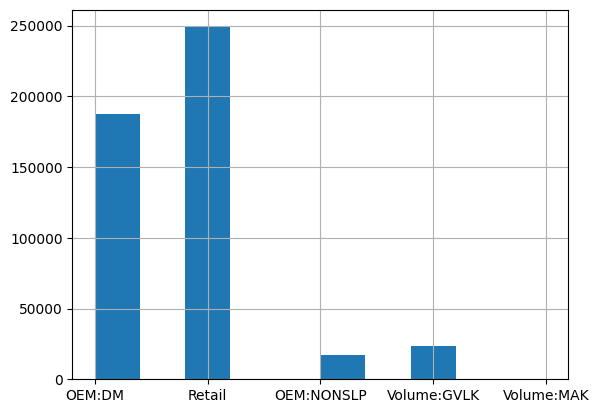

In [216]:
df["Census_ActivationChannel"].hist()

Podemos ver que hay dos valores que predominan. Podriamos prescindir de las pocas observaciones con valores `Volume:MAK` y `Retail:TB:Eval` para asi tener dos columnas catergoricas menos al hacer OHE

In [217]:
df[~df["Census_ActivationChannel"].isin(["Volume:MAK", "Retail:TB:Eval"])]["Census_ActivationChannel"].value_counts()

Census_ActivationChannel
Retail         248816
OEM:DM         187662
Volume:GVLK     23630
OEM:NONSLP      17106
Name: count, dtype: int64

---
### Census_IsFlightsDisabled

In [218]:
df["Census_IsFlightsDisabled"].value_counts()

Census_IsFlightsDisabled
0.0000    473546
1.0000         7
Name: count, dtype: int64

In [219]:
df[["Census_IsFlightsDisabled", "HasDetections"]].corr()

Census_IsFlightsDisabled  HasDetections
Census_IsFlightsDisabled                    1.0000        -0.0039
HasDetections                              -0.0039         1.0000

A parte de que la varianza es casi inexistente, la correlacion es tambien muy baja, por lo tanto eliminaremos esta columna.

In [220]:
del_columns.append('Census_IsFlightsDisabled')

---
### Census_FlightRing

In [221]:
df["Census_FlightRing"].value_counts()

Census_FlightRing
Retail      447406
NOT_SET      15264
Unknown      13154
WIS            571
RP             552
WIF            509
Disabled       198
OSG              1
Name: count, dtype: int64

<Axes: >

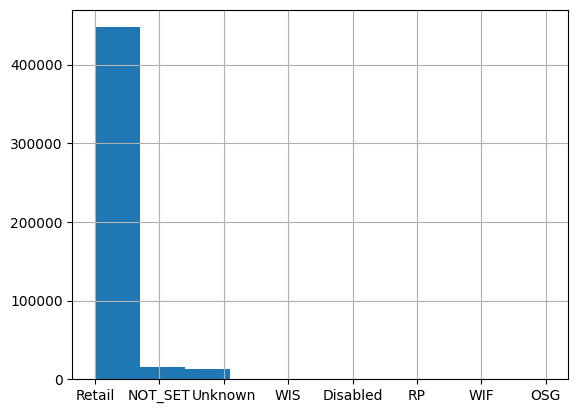

In [222]:
df["Census_FlightRing"].hist()

Aqui podemos apreciar valores muy desbalanceados y como poca variabilidad. Vamos a eliminar esta columna.

In [223]:
del_columns.append('Census_FlightRing')

---
### Census_FirmwareManufacturerIdentifier

In [224]:
df["Census_FirmwareManufacturerIdentifier"].value_counts().sort_index()

Census_FirmwareManufacturerIdentifier
11.0000        3
13.0000        1
17.0000        2
33.0000        1
34.0000        1
            ... 
1075.0000    264
1079.0000     10
1080.0000     54
1081.0000     11
1083.0000      8
Name: count, Length: 290, dtype: int64

In [225]:
df["Census_FirmwareManufacturerIdentifier"].value_counts().sort_values(ascending=False)

Census_FirmwareManufacturerIdentifier
142.0000    146794
628.0000     67231
554.0000     64642
355.0000     51272
556.0000     43974
             ...  
626.0000         1
574.0000         1
423.0000         1
709.0000         1
585.0000         1
Name: count, Length: 290, dtype: int64

<Axes: >

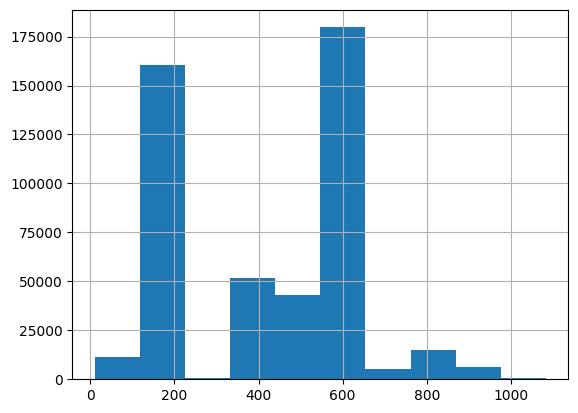

In [226]:
df["Census_FirmwareManufacturerIdentifier"].hist()

In [227]:
df_save = df.copy()

In [228]:
# Obtener las seis categorías más frecuentes
top_6_categories = df["Census_FirmwareManufacturerIdentifier"].value_counts().nlargest(6).index

# Renombrar las categorías y agrupar las restantes bajo "Otros"
df["Census_FirmwareManufacturerIdentifier"] = df["Census_FirmwareManufacturerIdentifier"].apply(
    lambda x: f"Id_{x}" if x in top_6_categories else "Otros"
)

# Realizar One-Hot Encoding
df = pd.get_dummies(df, columns=["Census_FirmwareManufacturerIdentifier"], prefix="FirmwareManufacturer", prefix_sep="")

In [229]:
corr, p_value = pointbiserialr(df['FirmwareManufacturerId_142.0'], df['HasDetections'])
print(f'Correlación: {corr}, p-valor: {p_value}')

Correlación: 0.024170711259291315, p-valor: 1.157719678223397e-62


Al final hemos decidido mantener la columna como un ID y veremos cuanto ayuda al modelo.

---
### Census_FirmwareVersionIdentifier

In [230]:
df["Census_FirmwareVersionIdentifier"].value_counts().sort_index()

Census_FirmwareVersionIdentifier
10.0000       1
23.0000       1
33.0000       1
37.0000       1
38.0000       2
             ..
72077.0000    4
72079.0000    1
72080.0000    2
72087.0000    1
72089.0000    1
Name: count, Length: 22703, dtype: int64

In [231]:
df["Census_FirmwareVersionIdentifier"].value_counts().sort_values(ascending=False)

Census_FirmwareVersionIdentifier
33105.0000    4983
33111.0000    3297
33054.0000    3089
33108.0000    3017
63175.0000    2903
              ... 
17783.0000       1
36818.0000       1
12215.0000       1
3490.0000        1
54497.0000       1
Name: count, Length: 22703, dtype: int64

<Axes: >

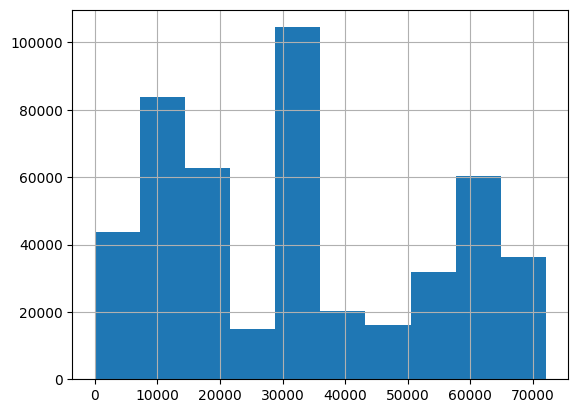

In [232]:
df["Census_FirmwareVersionIdentifier"].hist()

In [233]:
df["Census_FirmwareVersionIdentifier"].nunique()

22703

In [234]:
df[["Census_FirmwareVersionIdentifier", "HasDetections"]].corr()

Census_FirmwareVersionIdentifier  \
Census_FirmwareVersionIdentifier                            1.0000   
HasDetections                                               0.0012   

                                  HasDetections  
Census_FirmwareVersionIdentifier         0.0012  
HasDetections                            1.0000

Una vez mas, tiene poca correlacion. Prescindimos de ella.

In [235]:
del_columns.append('Census_FirmwareVersionIdentifier')

---
### Census_IsSecureBootEnabled

In [236]:
df["Census_IsSecureBootEnabled"].value_counts().sort_index()

Census_IsSecureBootEnabled
0    239808
1    237847
Name: count, dtype: int64

In [237]:
df[["Census_IsSecureBootEnabled", "HasDetections"]].corr()

Census_IsSecureBootEnabled  HasDetections
Census_IsSecureBootEnabled                      1.0000        -0.0040
HasDetections                                  -0.0040         1.0000

<Axes: >

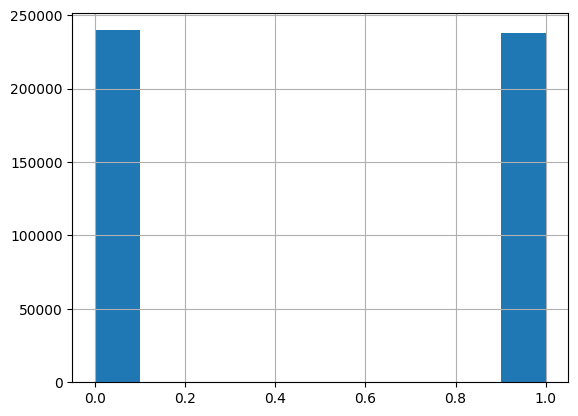

In [238]:
df["Census_IsSecureBootEnabled"].hist()

Aqui podemos ver que la relacion con el target es muy baja. Eliminaremos esta columna.

In [239]:
del_columns.append('Census_IsSecureBootEnabled')

---
### Census_IsVirtualDevice

In [240]:
df["Census_IsVirtualDevice"].value_counts().sort_index()

Census_IsVirtualDevice
0.0000    474885
1.0000      1911
Name: count, dtype: int64

<Axes: >

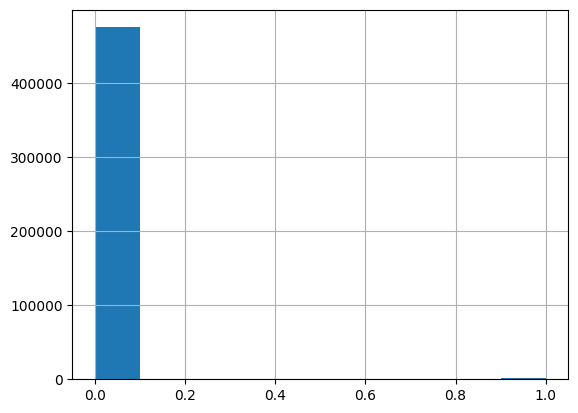

In [241]:
df["Census_IsVirtualDevice"].hist()

In [242]:
df[["Census_IsVirtualDevice", "HasDetections"]].corr()

Census_IsVirtualDevice  HasDetections
Census_IsVirtualDevice                  1.0000        -0.0394
HasDetections                          -0.0394         1.0000

Siendo la correlacion tan baja y el balance de datos tan descompensado tambien vamos a eliminar esta columna.

In [243]:
del_columns.append('Census_IsVirtualDevice')

---
### Census_IsTouchEnabled

In [244]:
df["Census_IsTouchEnabled"].value_counts().sort_index()

Census_IsTouchEnabled
0    416380
1     61275
Name: count, dtype: int64

<Axes: >

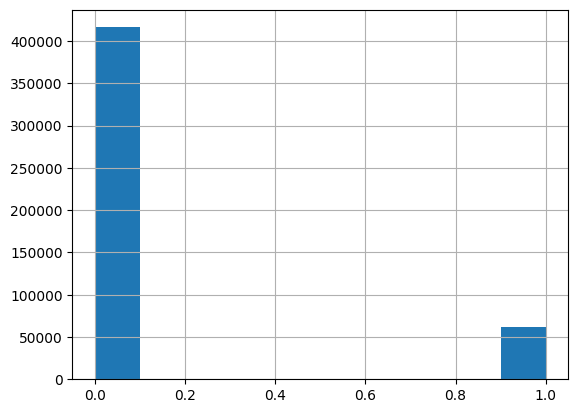

In [245]:
df["Census_IsTouchEnabled"].hist()

In [246]:
df[["Census_IsTouchEnabled", "HasDetections"]].corr()

Census_IsTouchEnabled  HasDetections
Census_IsTouchEnabled                 1.0000        -0.0414
HasDetections                        -0.0414         1.0000

No hay mucha correlacion con el target y los valores estan descompensados. Eliminamos la columna.

In [247]:
del_columns.append('Census_IsTouchEnabled')

---
### Census_IsPenCapable

In [248]:
df["Census_IsPenCapable"].value_counts().sort_index()

Census_IsPenCapable
0    459287
1     18368
Name: count, dtype: int64

<Axes: >

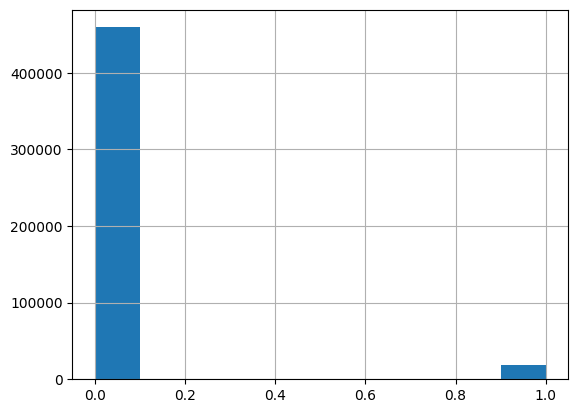

In [249]:
df["Census_IsPenCapable"].hist()

In [250]:
df[["Census_IsPenCapable", "HasDetections"]].corr()

Census_IsPenCapable  HasDetections
Census_IsPenCapable               1.0000        -0.0176
HasDetections                    -0.0176         1.0000

No hay mucha correlacion con el target y los valores estan descompensados. Eliminamos la columna.

In [251]:
del_columns.append('Census_IsPenCapable')

---
### Census_IsAlwaysOnAlwaysConnectedCapable

In [252]:
df["Census_IsAlwaysOnAlwaysConnectedCapable"].value_counts().sort_index()

Census_IsAlwaysOnAlwaysConnectedCapable
0.0000    448401
1.0000     28062
Name: count, dtype: int64

<Axes: >

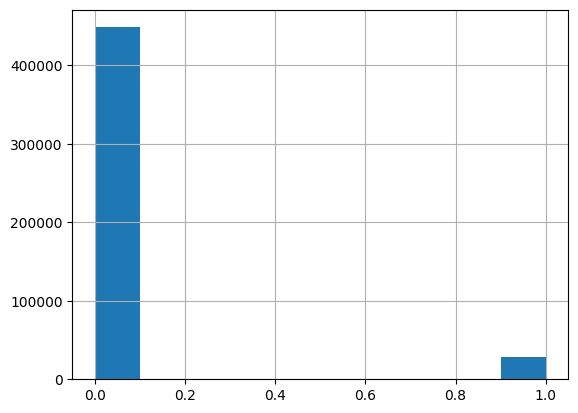

In [253]:
df["Census_IsAlwaysOnAlwaysConnectedCapable"].hist()

In [254]:
df[["Census_IsAlwaysOnAlwaysConnectedCapable", "HasDetections"]].corr()

Census_IsAlwaysOnAlwaysConnectedCapable  \
Census_IsAlwaysOnAlwaysConnectedCapable                                   1.0000   
HasDetections                                                            -0.0643   

                                         HasDetections  
Census_IsAlwaysOnAlwaysConnectedCapable        -0.0643  
HasDetections                                   1.0000

No hay mucha correlacion con el target y los valores estan descompensados. Eliminamos la columna.

In [255]:
del_columns.append('Census_IsAlwaysOnAlwaysConnectedCapable')

---
### Wdft_IsGamer

In [256]:
df["Wdft_IsGamer"].value_counts().sort_index()

Wdft_IsGamer
0.0000    328635
1.0000    133032
Name: count, dtype: int64

<Axes: >

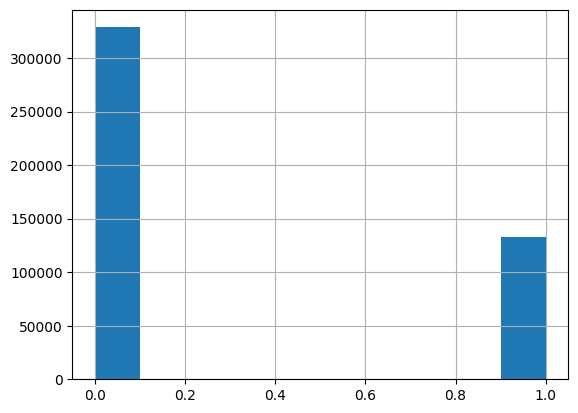

In [257]:
df["Wdft_IsGamer"].hist()

In [258]:
df[["Wdft_IsGamer", "HasDetections"]].corr()

Wdft_IsGamer  HasDetections
Wdft_IsGamer         1.0000         0.0568
HasDetections        0.0568         1.0000

No hay mucha correlacion con el target y los valores estan descompensados. Eliminamos la columna.

In [259]:
del_columns.append('Wdft_IsGamer')

---
### Wdft_RegionIdentifier

In [260]:
df["Wdft_RegionIdentifier"].value_counts().sort_index()

Wdft_RegionIdentifier
1.0000     66322
2.0000      4223
3.0000     69545
4.0000      7065
5.0000     10753
6.0000      8182
7.0000     31700
8.0000     15091
9.0000      4248
10.0000    96313
11.0000    73024
12.0000     8617
13.0000    11797
14.0000      211
15.0000    54576
Name: count, dtype: int64

In [261]:
# Calcular el umbral del 5%
threshold = len(df) * 0.05

# Obtener los valores que superan el umbral
top_region_ids = df["Wdft_RegionIdentifier"].value_counts()[df["Wdft_RegionIdentifier"].value_counts() > threshold].index

# Renombrar las categorías y agrupar las restantes bajo "OtrosRegionId"
df["Wdft_RegionIdentifier"] = df["Wdft_RegionIdentifier"].apply(
    lambda x: f"RegionId_{x}" if x in top_region_ids else "OtrosRegionId"
)

# Realizar One-Hot Encoding
df = pd.get_dummies(df, columns=["Wdft_RegionIdentifier"], prefix="", prefix_sep="")

In [262]:
df.head()

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0            7.0000                 0   
1  4.18.1807.18075  1.273.1282.0       0            7.0000                 0   
2   4.9.10586.1106   1.273.781.0       0            7.0000                 0   
3  4.18.1807.18075  1.275.1639.0       0            7.0000                 0   
4  4.18.1807.18075   1.275.511.0       0            7.0000                 0   

   DefaultBrowsersIdentifier  ...  FirmwareManufacturerId_556.0  \
0                        NaN  ...                         False   
1                        NaN  ...                         False   
2                        NaN  ...                         False   
3                        NaN  ...                         False   
4                        NaN  ...                         False   

   FirmwareManufacturerId_628.0  FirmwareManufacturerOtros  OtrosRegionId  \
0                         False                      False          False   
1                         False                       True          False   
2                         False                      False          False   
3                         False                      False          False   
4                         False                      False           True   

   RegionId_1.0  RegionId_10.0  RegionId_11.0  RegionId_15.0  RegionId_3.0  \
0         False          False           True          False         False   
1         False          False          False          False          True   
2         False          False          False           True         False   
3         False          False          False           True         False   
4         False          False          False          False         False   

   RegionId_7.0  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 106 columns]

Aqui se podria hcer el mismo procedimiento que hemos hecho con `Census_FirmwareManufacturerIdentifier` o se borra directamente. Para hablarlo.

In [263]:
df[['OtrosRegionId','RegionId_1.0','RegionId_10.0','RegionId_11.0','RegionId_15.0','RegionId_3.0','RegionId_7.0']].corrwith(df['HasDetections'])

OtrosRegionId   -0.0142
RegionId_1.0     0.0287
RegionId_10.0    0.0113
RegionId_11.0    0.0018
RegionId_15.0   -0.0233
RegionId_3.0    -0.0072
RegionId_7.0     0.0012
dtype: float64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477655 entries, 0 to 499999
Columns: 106 entries, Unnamed: 0 to RegionId_7.0
dtypes: bool(32), float64(32), int64(20), object(22)
memory usage: 287.9+ MB


## Borramos las columnas que no necesitamos

In [265]:
df.drop(del_columns, axis=1, inplace=True)

In [266]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [267]:
df

AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                      53447.0000               1.0000             1.0000   
1                      53447.0000               1.0000             1.0000   
2                      46781.0000               2.0000             1.0000   
3                      53447.0000               1.0000             1.0000   
4                      47238.0000               2.0000             1.0000   
...                           ...                  ...                ...   
442156                 53447.0000               1.0000             1.0000   
442157                 53447.0000               1.0000             1.0000   
442158                 53447.0000               1.0000             1.0000   
442159                 43856.0000               2.0000             1.0000   
442160                 53447.0000               1.0000             1.0000   

        Processor  OsVer  OsSuite SkuEdition  IsProtected  IeVerIdentifier  \
0               0      0      256        Pro       1.0000         137.0000   
1               0      0      256        Pro       1.0000         137.0000   
2               0      0      768       Home       1.0000          74.0000   
3               0      0      768       Home       1.0000         137.0000   
4               0      0      256        Pro       1.0000         137.0000   
...           ...    ...      ...        ...          ...              ...   
442156          0      0      768       Home       1.0000          74.0000   
442157          0      0      768       Home       1.0000         111.0000   
442158          1      0      256        Pro       1.0000         137.0000   
442159          0      0      256        Pro       1.0000         117.0000   
442160          0      0      256        Pro       1.0000         137.0000   

        Firewall  ...  FirmwareManufacturerId_556.0  \
0         1.0000  ...                         False   
1         1.0000  ...                         False   
2         1.0000  ...                         False   
3         1.0000  ...                         False   
4         1.0000  ...                         False   
...          ...  ...                           ...   
442156    1.0000  ...                         False   
442157    1.0000  ...                         False   
442158    1.0000  ...                         False   
442159    1.0000  ...                         False   
442160    1.0000  ...                         False   

        FirmwareManufacturerId_628.0  FirmwareManufacturerOtros  \
0                              False                      False   
1                              False                       True   
2                              False                      False   
3                              False                      False   
4                              False                      False   
...                              ...                        ...   
442156                         False                       True   
442157                         False                       True   
442158                         False                      False   
442159                          True                      False   
442160                         False                      False   

        OtrosRegionId  RegionId_1.0  RegionId_10.0  RegionId_11.0  \
0               False         False          False           True   
1               False         False          False          False   
2               False         False          False          False   
3               False         False          False          False   
4                True         False          False          False   
...               ...           ...            ...            ...   
442156          False         False          False          False   
442157          False         False          False          False   
442158           True         False          False         

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442161 entries, 0 to 442160
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   AVProductStatesIdentifier               442161 non-null  float64
 1   AVProductsInstalled                     442161 non-null  float64
 2   AVProductsEnabled                       442161 non-null  float64
 3   Processor                               442161 non-null  int64  
 4   OsVer                                   442161 non-null  int64  
 5   OsSuite                                 442161 non-null  int64  
 6   SkuEdition                              442161 non-null  object 
 7   IsProtected                             442161 non-null  float64
 8   IeVerIdentifier                         442161 non-null  float64
 9   Firewall                                442161 non-null  float64
 10  UacLuaenable                            4421

## Modificamos algunas columnas

In [269]:
df['OsSuite'] = df['OsSuite'].apply(lambda x: 1 if x==768 else 0)
df['SkuEdition'] = df['SkuEdition'].apply(lambda x: "Other" if x not in list(["Home", "Pro"]) else x)
df['SkuEdition'] = df['SkuEdition'].replace({"Home": 0, "Pro": 1, "Other": 2})
df['IeVerIdentifier'] = df['IeVerIdentifier'].apply(lambda x: "Other" if x not in list([137.0000, 117.0000, 108.0000, 111.0000]) else x)
df['IeVerIdentifier'] = df['IeVerIdentifier'].replace({"Other": 0, 108: 1, 111: 2, 117: 3, 137: 4})
df['Census_OEMNameIdentifier'] = df['Census_OEMNameIdentifier'].apply(lambda x: "Other" if x not in list([2668.0000, 2102.0000, 1443.0000, 2206.0000, 585.0000, 525.0000]) else x)
df['Census_OEMNameIdentifier'] = df['Census_OEMNameIdentifier'].replace({"Other": 0, 525: 1, 585: 2, 1443: 3, 2102: 4, 2206: 5, 2668: 6})
df['Census_ProcessorCoreCount'] = df['Census_ProcessorCoreCount'].apply(lambda x: "Other" if x not in list([4.0, 2.0, 8.0]) else x)
df['Census_ProcessorCoreCount'] = df['Census_ProcessorCoreCount'].replace({"Other": 0, 2: 1, 4: 2, 8: 3})
df['Census_ActivationChannel'] = df['Census_ActivationChannel'].apply(lambda x: x.split(":")[0])
df['Census_ProcessorManufacturerIdentifier'] = df['Census_ProcessorManufacturerIdentifier'].replace({1: 0, 5: 1})
df['Census_OSWUAutoUpdateOptionsName'] = df['Census_OSWUAutoUpdateOptionsName'].replace({"FullAuto": 0, "UNKNOWN": 1, "Notify": 2, "AutoInstallAndRebootAtMaintenanceTime": 3, "Off": 4})
df['Census_GenuineStateName'] = df['Census_GenuineStateName'].replace({"IS_GENUINE": 0, "INVALID_LICENSE": 1, "OFFLINE": 2})
df['Census_ActivationChannel'] = df['Census_ActivationChannel'].replace({"Retail": 0, "OEM": 1, "Volume": 2})
df['AppVersion_trimmed'] = df['AppVersion_trimmed'].apply(lambda x: "Other" if x not in list(["18"]) else x)
df["AppVersion_trimmed"] = df["AppVersion_trimmed"].replace({"Other": 0, "18": 1})


In [270]:
df_save = df.copy()

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442161 entries, 0 to 442160
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   AVProductStatesIdentifier               442161 non-null  float64
 1   AVProductsInstalled                     442161 non-null  float64
 2   AVProductsEnabled                       442161 non-null  float64
 3   Processor                               442161 non-null  int64  
 4   OsVer                                   442161 non-null  int64  
 5   OsSuite                                 442161 non-null  int64  
 6   SkuEdition                              442161 non-null  int64  
 7   IsProtected                             442161 non-null  float64
 8   IeVerIdentifier                         442161 non-null  float64
 9   Firewall                                442161 non-null  float64
 10  UacLuaenable                            4421

In [272]:
pd.set_option('display.max_columns', None)
df.head(5)

AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                 53447.0000               1.0000             1.0000   
1                 53447.0000               1.0000             1.0000   
2                 46781.0000               2.0000             1.0000   
3                 53447.0000               1.0000             1.0000   
4                 47238.0000               2.0000             1.0000   

   Processor  OsVer  OsSuite  SkuEdition  IsProtected  IeVerIdentifier  \
0          0      0        0           1       1.0000           4.0000   
1          0      0        0           1       1.0000           4.0000   
2          0      0        1           0       1.0000           0.0000   
3          0      0        1           0       1.0000           4.0000   
4          0      0        0           1       1.0000           4.0000   

   Firewall  UacLuaenable  Census_OEMNameIdentifier  \
0    1.0000        1.0000                    3.0000   
1    1.0000        1.0000                    4.0000   
2    1.0000        1.0000                    5.0000   
3    1.0000        1.0000                    1.0000   
4    1.0000        1.0000                    3.0000   

   Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  \
0                     2.0000                                  1.0000   
1                     2.0000                                  1.0000   
2                     2.0000                                  1.0000   
3                     3.0000                                  1.0000   
4                     2.0000                                  0.0000   

   Census_ProcessorModelIdentifier  Census_HasOpticalDiskDrive  \
0                        2273.0000                           0   
1                        2660.0000                           0   
2                        2998.0000                           0   
3                        2880.0000                           0   
4                         198.0000                           0   

   Census_PowerPlatformRoleName  Census_OSBuildNumber  \
0                             1                 17134   
1                             0                 17134   
2                             0                 10586   
3                             0                 17134   
4                             0                 17134   

   Census_OSWUAutoUpdateOptionsName  Census_GenuineStateName  \
0                                 0                        0   
1                                 0                        0   
2                                 2                        0   
3                                 0                        0   
4                                 0                        0   

   Census_ActivationChannel  HasDetections EngineVersion_trimmed  \
0                         1              1                 15100   
1                         1              0                 15100   
2                         0              0                 15100   
3                         0              1                 15200   
4                         1              1                 15200   

   AppVersion_trimmed AvSigVersion_trimmed  Platform_windows10  \
0                   1                  273                True   
1                   1                  273                True   
2                   0                  273                True   
3                   1                  275                True   
4                   1                  275                True   

   Platform_windows7  Platform_windows8  Census_PrimaryDiskTypeName_HDD  \
0              False              False                            True   
1              False              False                            True   
2              False              False                           False   
3              False              False                           False   
4              False              False                

Cambiamos las columnas a tipo int para que ocupen menos espacio en memoria, no es necesario

In [273]:
df = df.astype({
    "Census_PowerPlatformRoleName": "int64",
    "AVProductStatesIdentifier": "int64",
    "AVProductsInstalled": "int64",
    "AVProductsEnabled": "int64",
    "IsProtected": "int64",
    "IeVerIdentifier": "int64",
    "Firewall": "int64",
    "UacLuaenable": "int64",
    "Census_OEMNameIdentifier": "int64",
    "Census_ProcessorCoreCount": "int64",
    "Census_ProcessorManufacturerIdentifier": "int64",
    "Census_ProcessorModelIdentifier": "int64",
    "EngineVersion_trimmed": "int64",
    "AvSigVersion_trimmed": "int64",
    
})

In [274]:
columnas_escalar = df.dtypes[df.dtypes == "int64"].index
df[columnas_escalar] = scaler.fit_transform(df[columnas_escalar])
df.head()

AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                     0.7582               0.0000             0.5000   
1                     0.7582               0.0000             0.5000   
2                     0.6636               0.5000             0.5000   
3                     0.7582               0.0000             0.5000   
4                     0.6701               0.5000             0.5000   

   Processor  OsVer  OsSuite  SkuEdition  IsProtected  IeVerIdentifier  \
0     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   
1     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   
2     0.0000 0.0000   1.0000      0.0000       1.0000           0.0000   
3     0.0000 0.0000   1.0000      0.0000       1.0000           1.0000   
4     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   

   Firewall  UacLuaenable  Census_OEMNameIdentifier  \
0    1.0000        1.0000                    0.5000   
1    1.0000        1.0000                    0.6667   
2    1.0000        1.0000                    0.8333   
3    1.0000        1.0000                    0.1667   
4    1.0000        1.0000                    0.5000   

   Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  \
0                     0.6667                                  1.0000   
1                     0.6667                                  1.0000   
2                     0.6667                                  1.0000   
3                     1.0000                                  1.0000   
4                     0.6667                                  0.0000   

   Census_ProcessorModelIdentifier  Census_HasOpticalDiskDrive  \
0                           0.5079                      0.0000   
1                           0.5945                      0.0000   
2                           0.6702                      0.0000   
3                           0.6438                      0.0000   
4                           0.0436                      0.0000   

   Census_PowerPlatformRoleName  Census_OSBuildNumber  \
0                        1.0000                0.8615   
1                        0.0000                0.8615   
2                        0.0000                0.0432   
3                        0.0000                0.8615   
4                        0.0000                0.8615   

   Census_OSWUAutoUpdateOptionsName  Census_GenuineStateName  \
0                            0.0000                   0.0000   
1                            0.0000                   0.0000   
2                            0.5000                   0.0000   
3                            0.0000                   0.0000   
4                            0.0000                   0.0000   

   Census_ActivationChannel  HasDetections  EngineVersion_trimmed  \
0                    0.5000         1.0000                 0.9592   
1                    0.5000         0.0000                 0.9592   
2                    0.0000         0.0000                 0.9592   
3                    0.0000         1.0000                 0.9796   
4                    0.5000         1.0000                 0.9796   

   AppVersion_trimmed  AvSigVersion_trimmed  Platform_windows10  \
0              1.0000                0.9630                True   
1              1.0000                0.9630                True   
2              0.0000                0.9630                True   
3              1.0000                0.9815                True   
4              1.0000                0.9815                True   

   Platform_windows7  Platform_windows8  Census_PrimaryDiskTypeName_HDD  \
0              False              False                            True   
1              False              False                            True   
2              False              False                           False   
3              False              False                           False   
4              False              False    

In [275]:
df_save = df.copy()

In [276]:
pd.set_option('display.max_columns', None)
df.head(5)

AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                     0.7582               0.0000             0.5000   
1                     0.7582               0.0000             0.5000   
2                     0.6636               0.5000             0.5000   
3                     0.7582               0.0000             0.5000   
4                     0.6701               0.5000             0.5000   

   Processor  OsVer  OsSuite  SkuEdition  IsProtected  IeVerIdentifier  \
0     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   
1     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   
2     0.0000 0.0000   1.0000      0.0000       1.0000           0.0000   
3     0.0000 0.0000   1.0000      0.0000       1.0000           1.0000   
4     0.0000 0.0000   0.0000      0.5000       1.0000           1.0000   

   Firewall  UacLuaenable  Census_OEMNameIdentifier  \
0    1.0000        1.0000                    0.5000   
1    1.0000        1.0000                    0.6667   
2    1.0000        1.0000                    0.8333   
3    1.0000        1.0000                    0.1667   
4    1.0000        1.0000                    0.5000   

   Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  \
0                     0.6667                                  1.0000   
1                     0.6667                                  1.0000   
2                     0.6667                                  1.0000   
3                     1.0000                                  1.0000   
4                     0.6667                                  0.0000   

   Census_ProcessorModelIdentifier  Census_HasOpticalDiskDrive  \
0                           0.5079                      0.0000   
1                           0.5945                      0.0000   
2                           0.6702                      0.0000   
3                           0.6438                      0.0000   
4                           0.0436                      0.0000   

   Census_PowerPlatformRoleName  Census_OSBuildNumber  \
0                        1.0000                0.8615   
1                        0.0000                0.8615   
2                        0.0000                0.0432   
3                        0.0000                0.8615   
4                        0.0000                0.8615   

   Census_OSWUAutoUpdateOptionsName  Census_GenuineStateName  \
0                            0.0000                   0.0000   
1                            0.0000                   0.0000   
2                            0.5000                   0.0000   
3                            0.0000                   0.0000   
4                            0.0000                   0.0000   

   Census_ActivationChannel  HasDetections  EngineVersion_trimmed  \
0                    0.5000         1.0000                 0.9592   
1                    0.5000         0.0000                 0.9592   
2                    0.0000         0.0000                 0.9592   
3                    0.0000         1.0000                 0.9796   
4                    0.5000         1.0000                 0.9796   

   AppVersion_trimmed  AvSigVersion_trimmed  Platform_windows10  \
0              1.0000                0.9630                True   
1              1.0000                0.9630                True   
2              0.0000                0.9630                True   
3              1.0000                0.9815                True   
4              1.0000                0.9815                True   

   Platform_windows7  Platform_windows8  Census_PrimaryDiskTypeName_HDD  \
0              False              False                            True   
1              False              False                            True   
2              False              False                           False   
3              False              False                           False   
4              False              False    

## Último analisis pre modelo

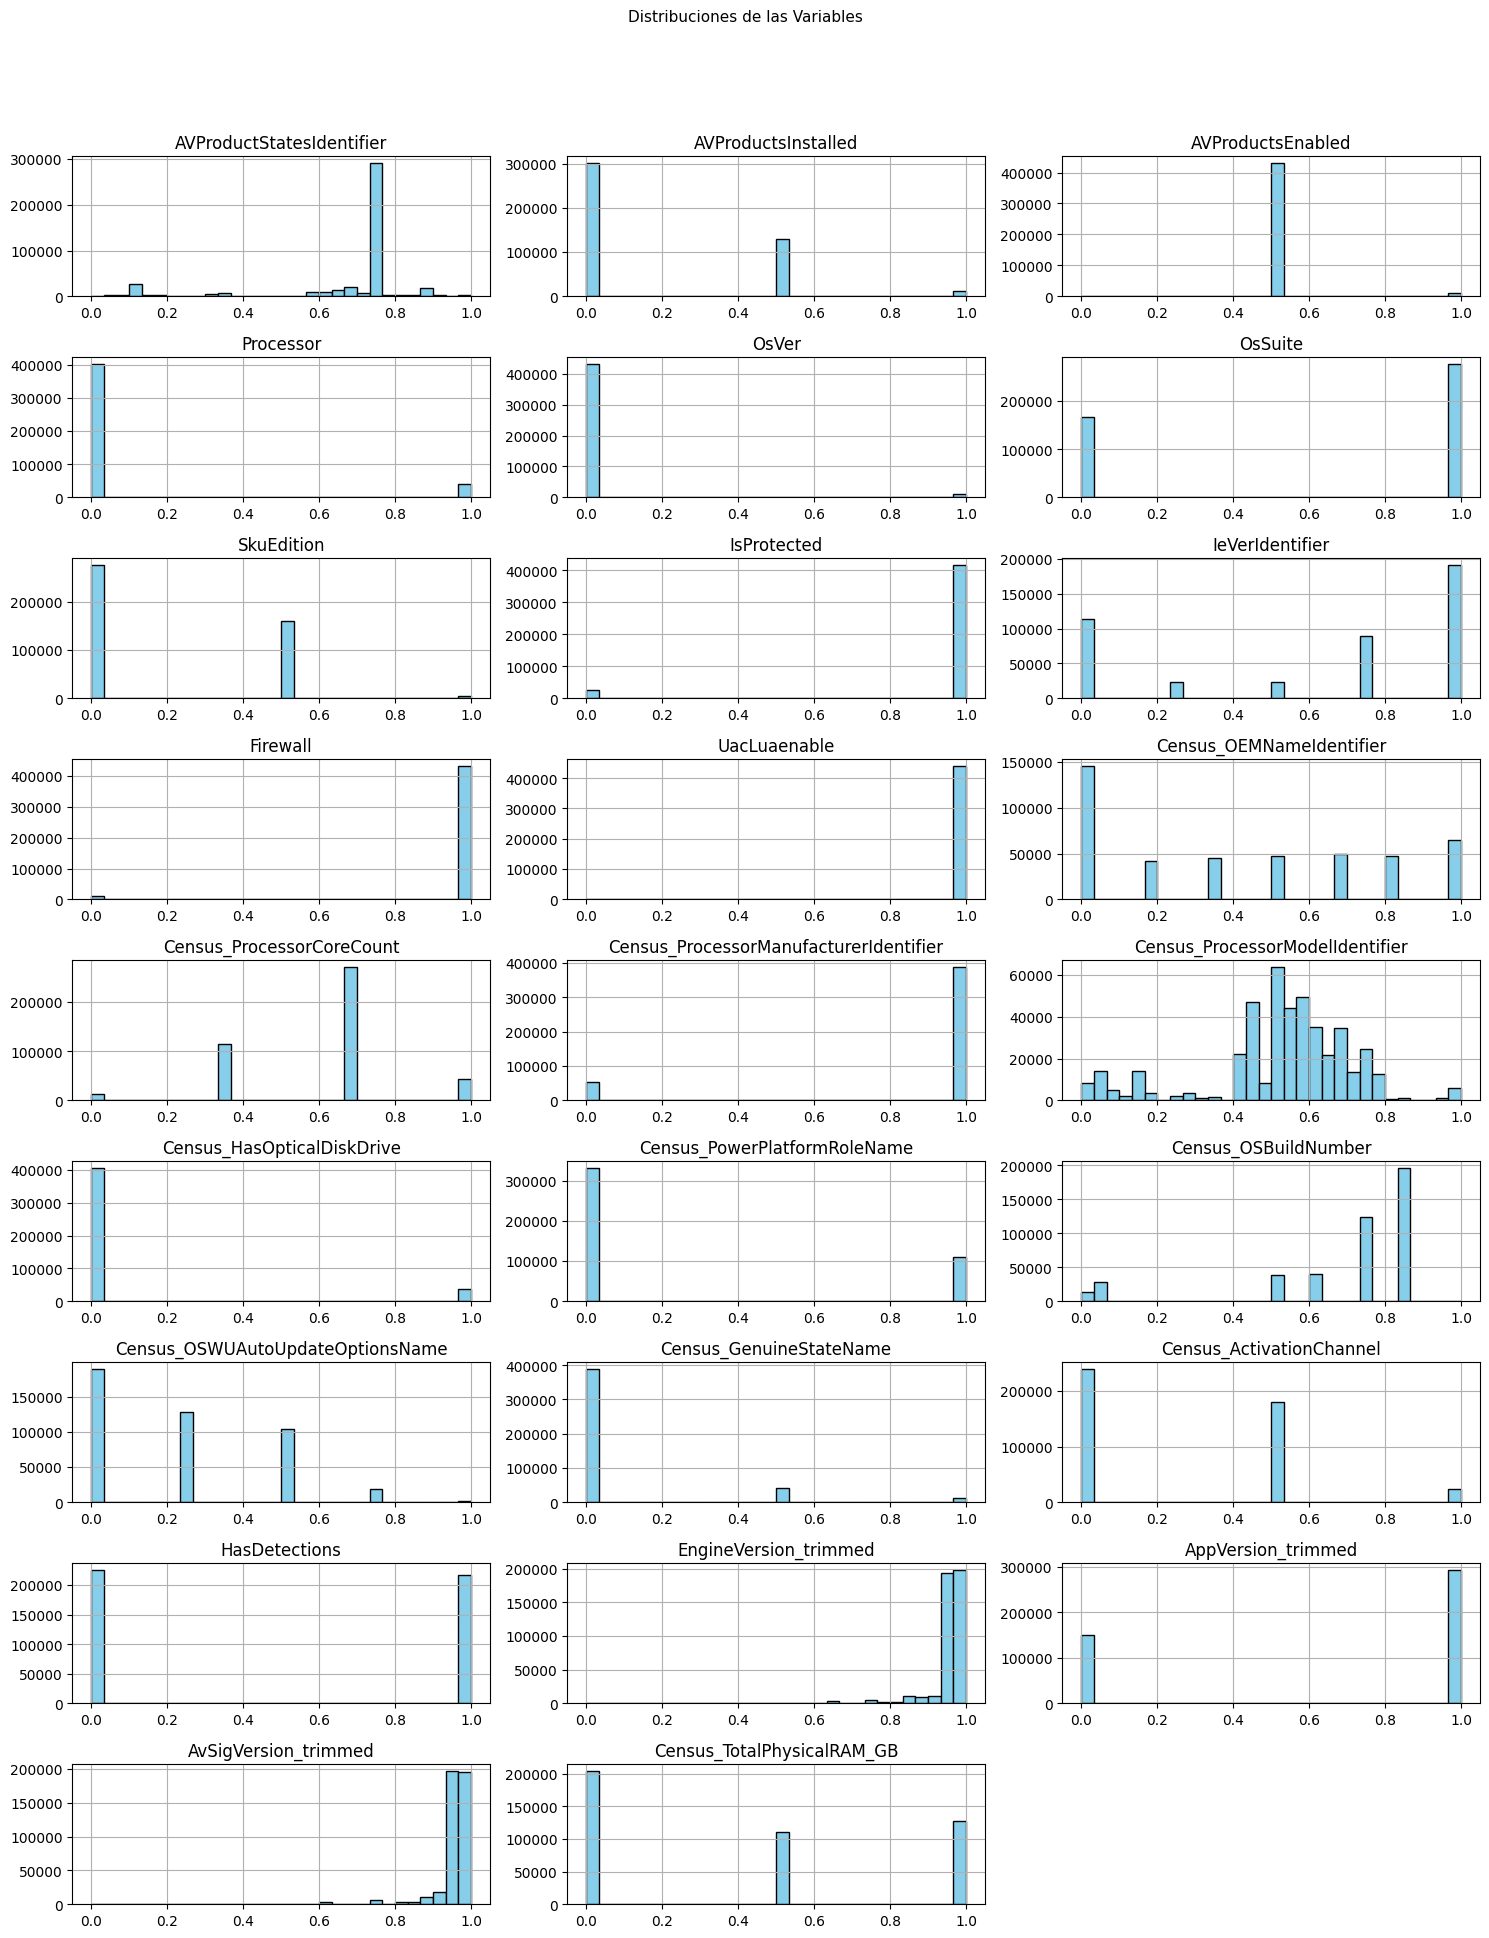

In [277]:
df.hist(bins=30, figsize=(15, 40), layout=(19, 3), edgecolor='black', color='skyblue')
plt.suptitle("Distribuciones de las Variables", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/gh/fgx2sy391b39mq0zmg0q_byr0000gn/T/ipykernel_9979/2538932364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HasDetections', palette=['skyblue', 'salmon'], edgecolor='black')


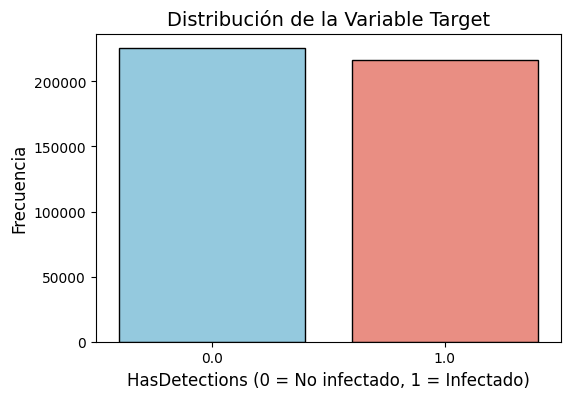

In [278]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HasDetections', palette=['skyblue', 'salmon'], edgecolor='black')

plt.title("Distribución de la Variable Target", fontsize=14)
plt.xlabel("HasDetections (0 = No infectado, 1 = Infectado)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()

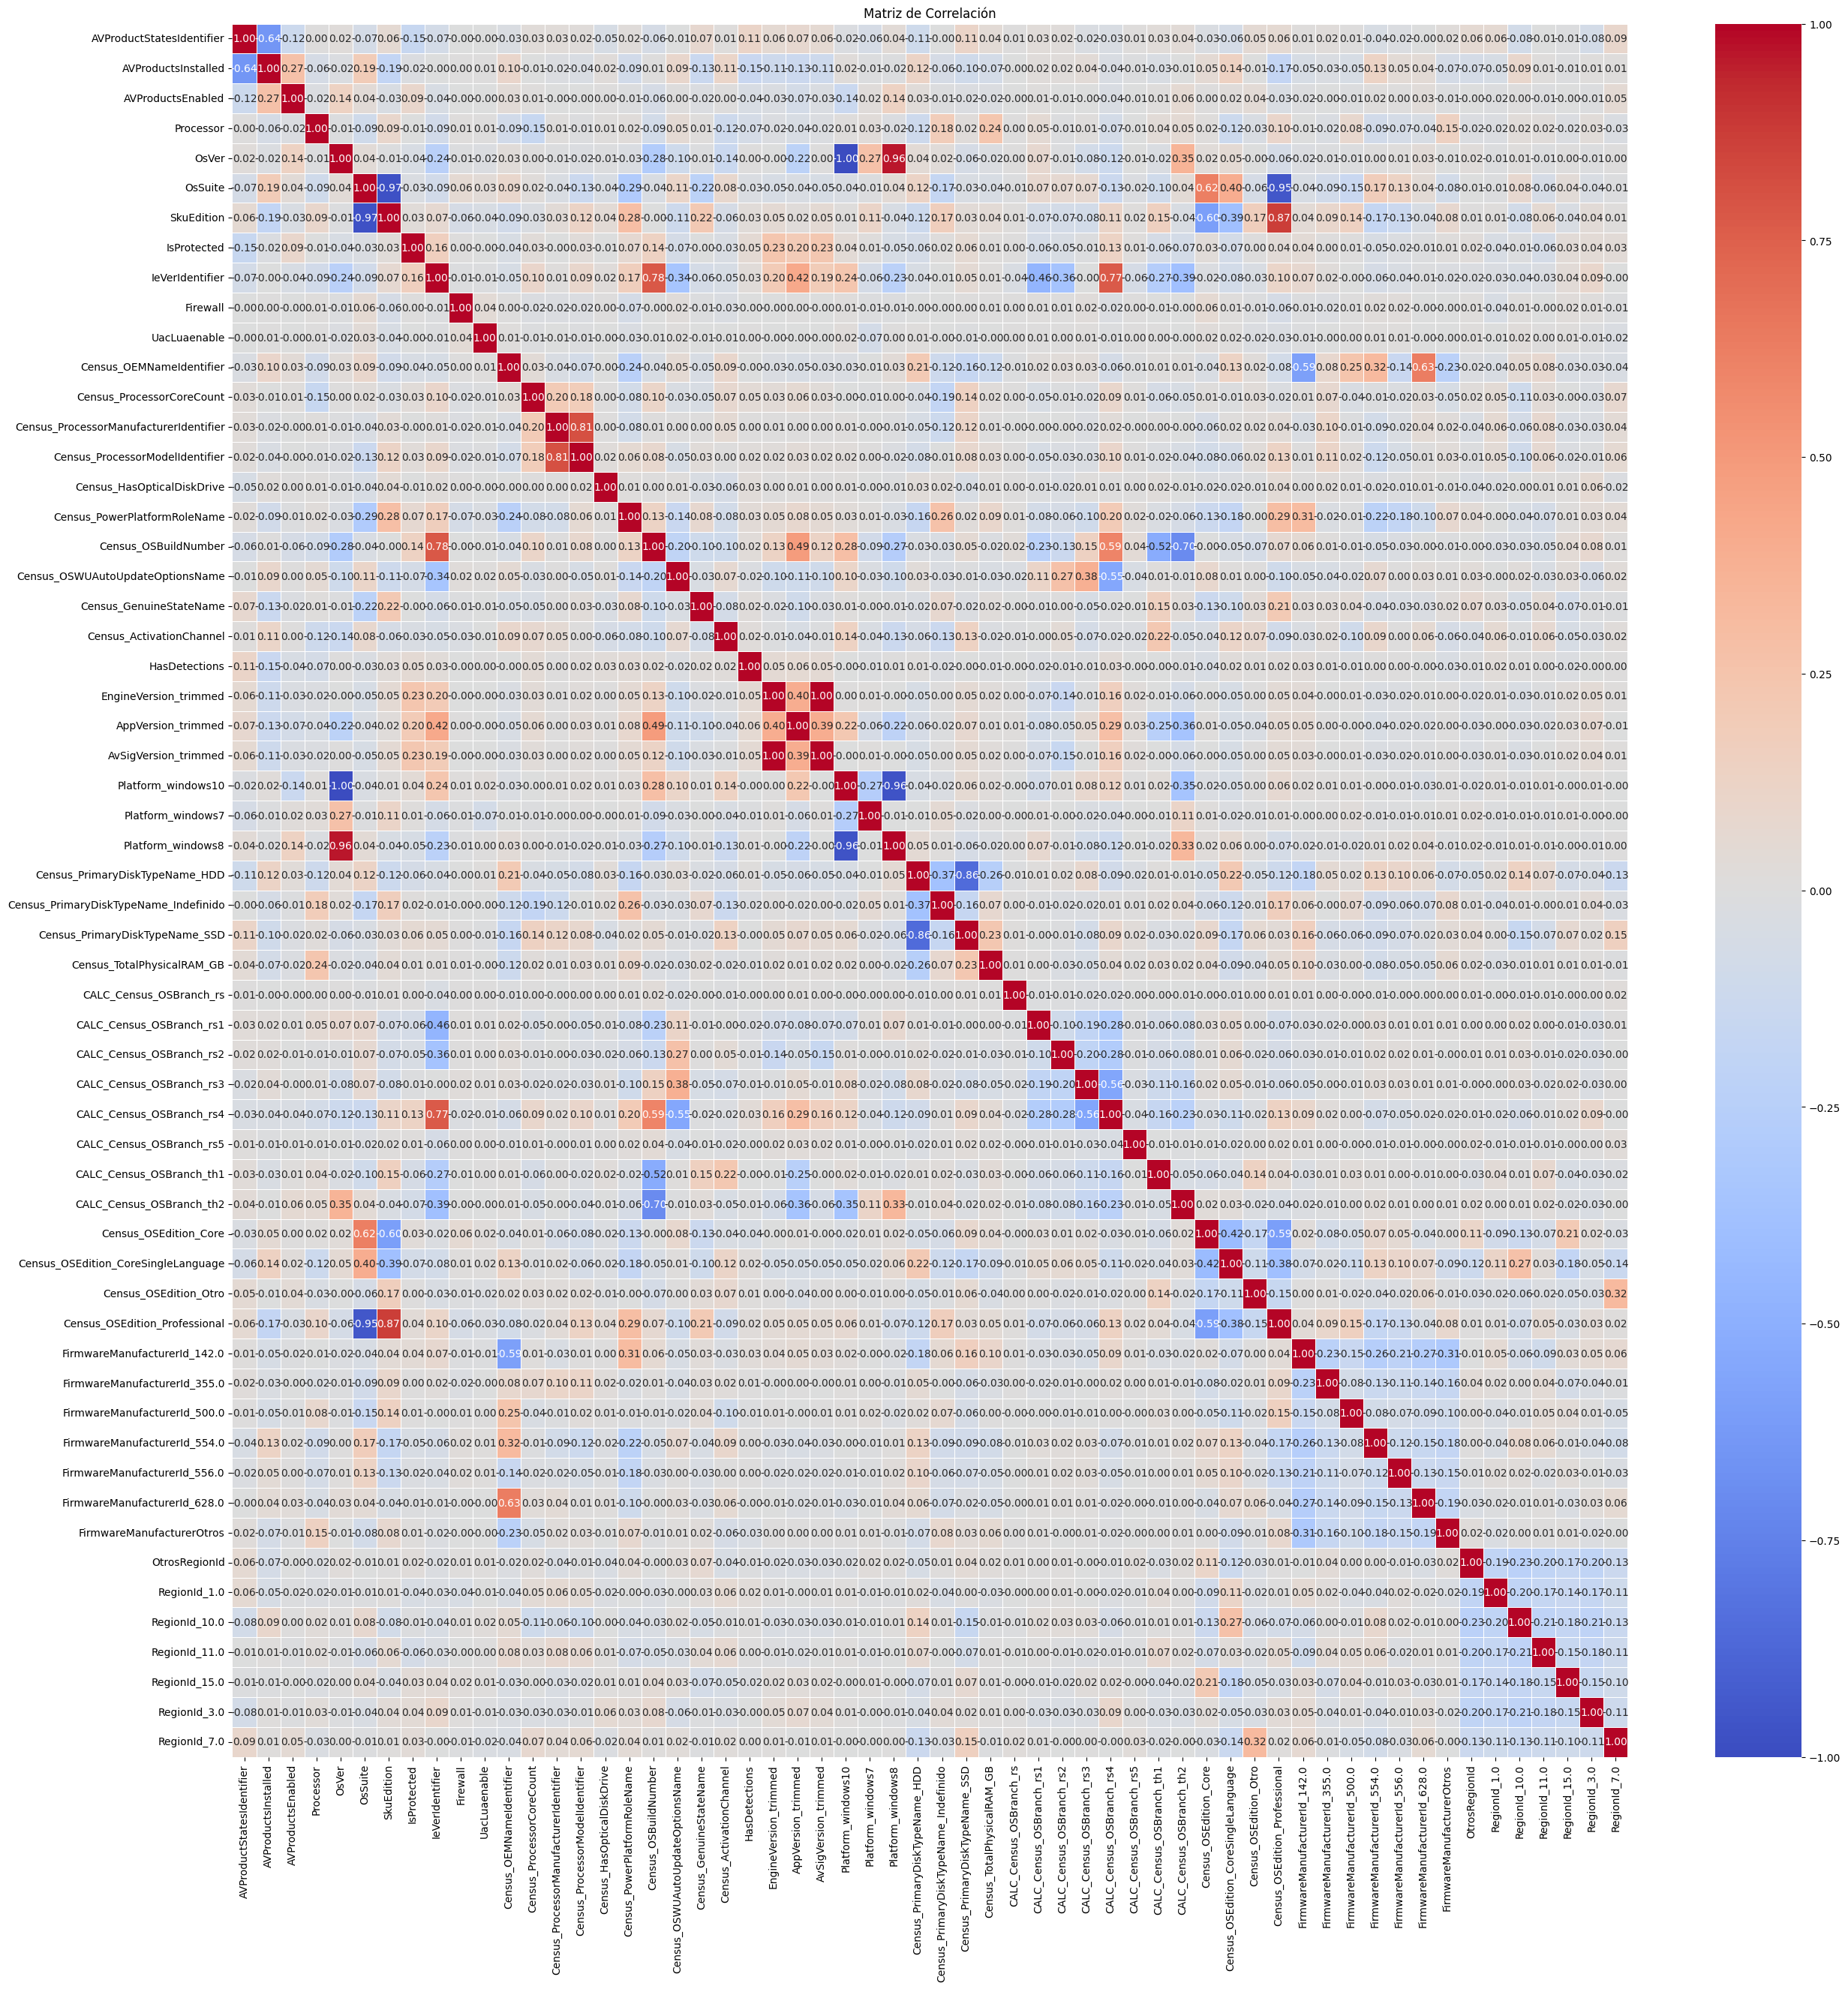

In [279]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()

Viendo la matriz de correlación pensamos en quitar las 3 columnas que hacen referencia a Platform_windows ya que tienen una correlación muy alta con otra variable, lo mismo nos ocurre con EngineVersion_trimmed y AvSigVersion_trimmed con 100% de correlación.

Otra variable que eliminaremos será SkuEdition y mantendremos OsSuite, las columnas OHE de Census_OSEdition tambien serán eliminadas, ya que la mayoría de ellas tiene bastante correlación con OsSuite.

La siguiente variable que eliminaremos será Census_OSBuildNumber que tiene correlación con IeVerIdentifier, las columnas que salen de Census_OSBranch al hacer OHE tienen bastante correlación con la variables IeVerIdentifier, como buscamos reducir dimensionalidad del dataframe eliminaremos las columnas que salen de Census_OSBranch.

Las columnas derivadas de Census_FirmwareManufacturerIdentifier serán eliminadas al estar bastante correlacionadas con Census_OEMNameIdentifier.

Una de las últimas columnas que eliminaré será Census_ProcessorModelIdentifier que tiene una correlación alta con la variable Census_ProcessorManufacturerIdentifier.

In [280]:
df = df_save.copy()

df.drop(columns=["Platform_windows10", "Platform_windows7", "Platform_windows8", "AvSigVersion_trimmed", 
                 "SkuEdition", "Census_OSEdition_Core", "Census_OSEdition_Professional", 
                 "Census_OSEdition_CoreSingleLanguage", "Census_OSEdition_Otro", 
                 "Census_OSBuildNumber", "CALC_Census_OSBranch_rs4", 
                 "CALC_Census_OSBranch_rs3", "CALC_Census_OSBranch_rs2", 
                 "CALC_Census_OSBranch_rs1", "CALC_Census_OSBranch_th2", 
                 "CALC_Census_OSBranch_th1", "CALC_Census_OSBranch_rs5", 
                 "CALC_Census_OSBranch_rs", "Census_ProcessorModelIdentifier", 
                 'FirmwareManufacturerId_142.0', 'FirmwareManufacturerId_355.0',
                 'FirmwareManufacturerId_500.0', 'FirmwareManufacturerId_554.0',
                 'FirmwareManufacturerId_556.0', 'FirmwareManufacturerId_628.0',
                 'FirmwareManufacturerOtros'], inplace=True)

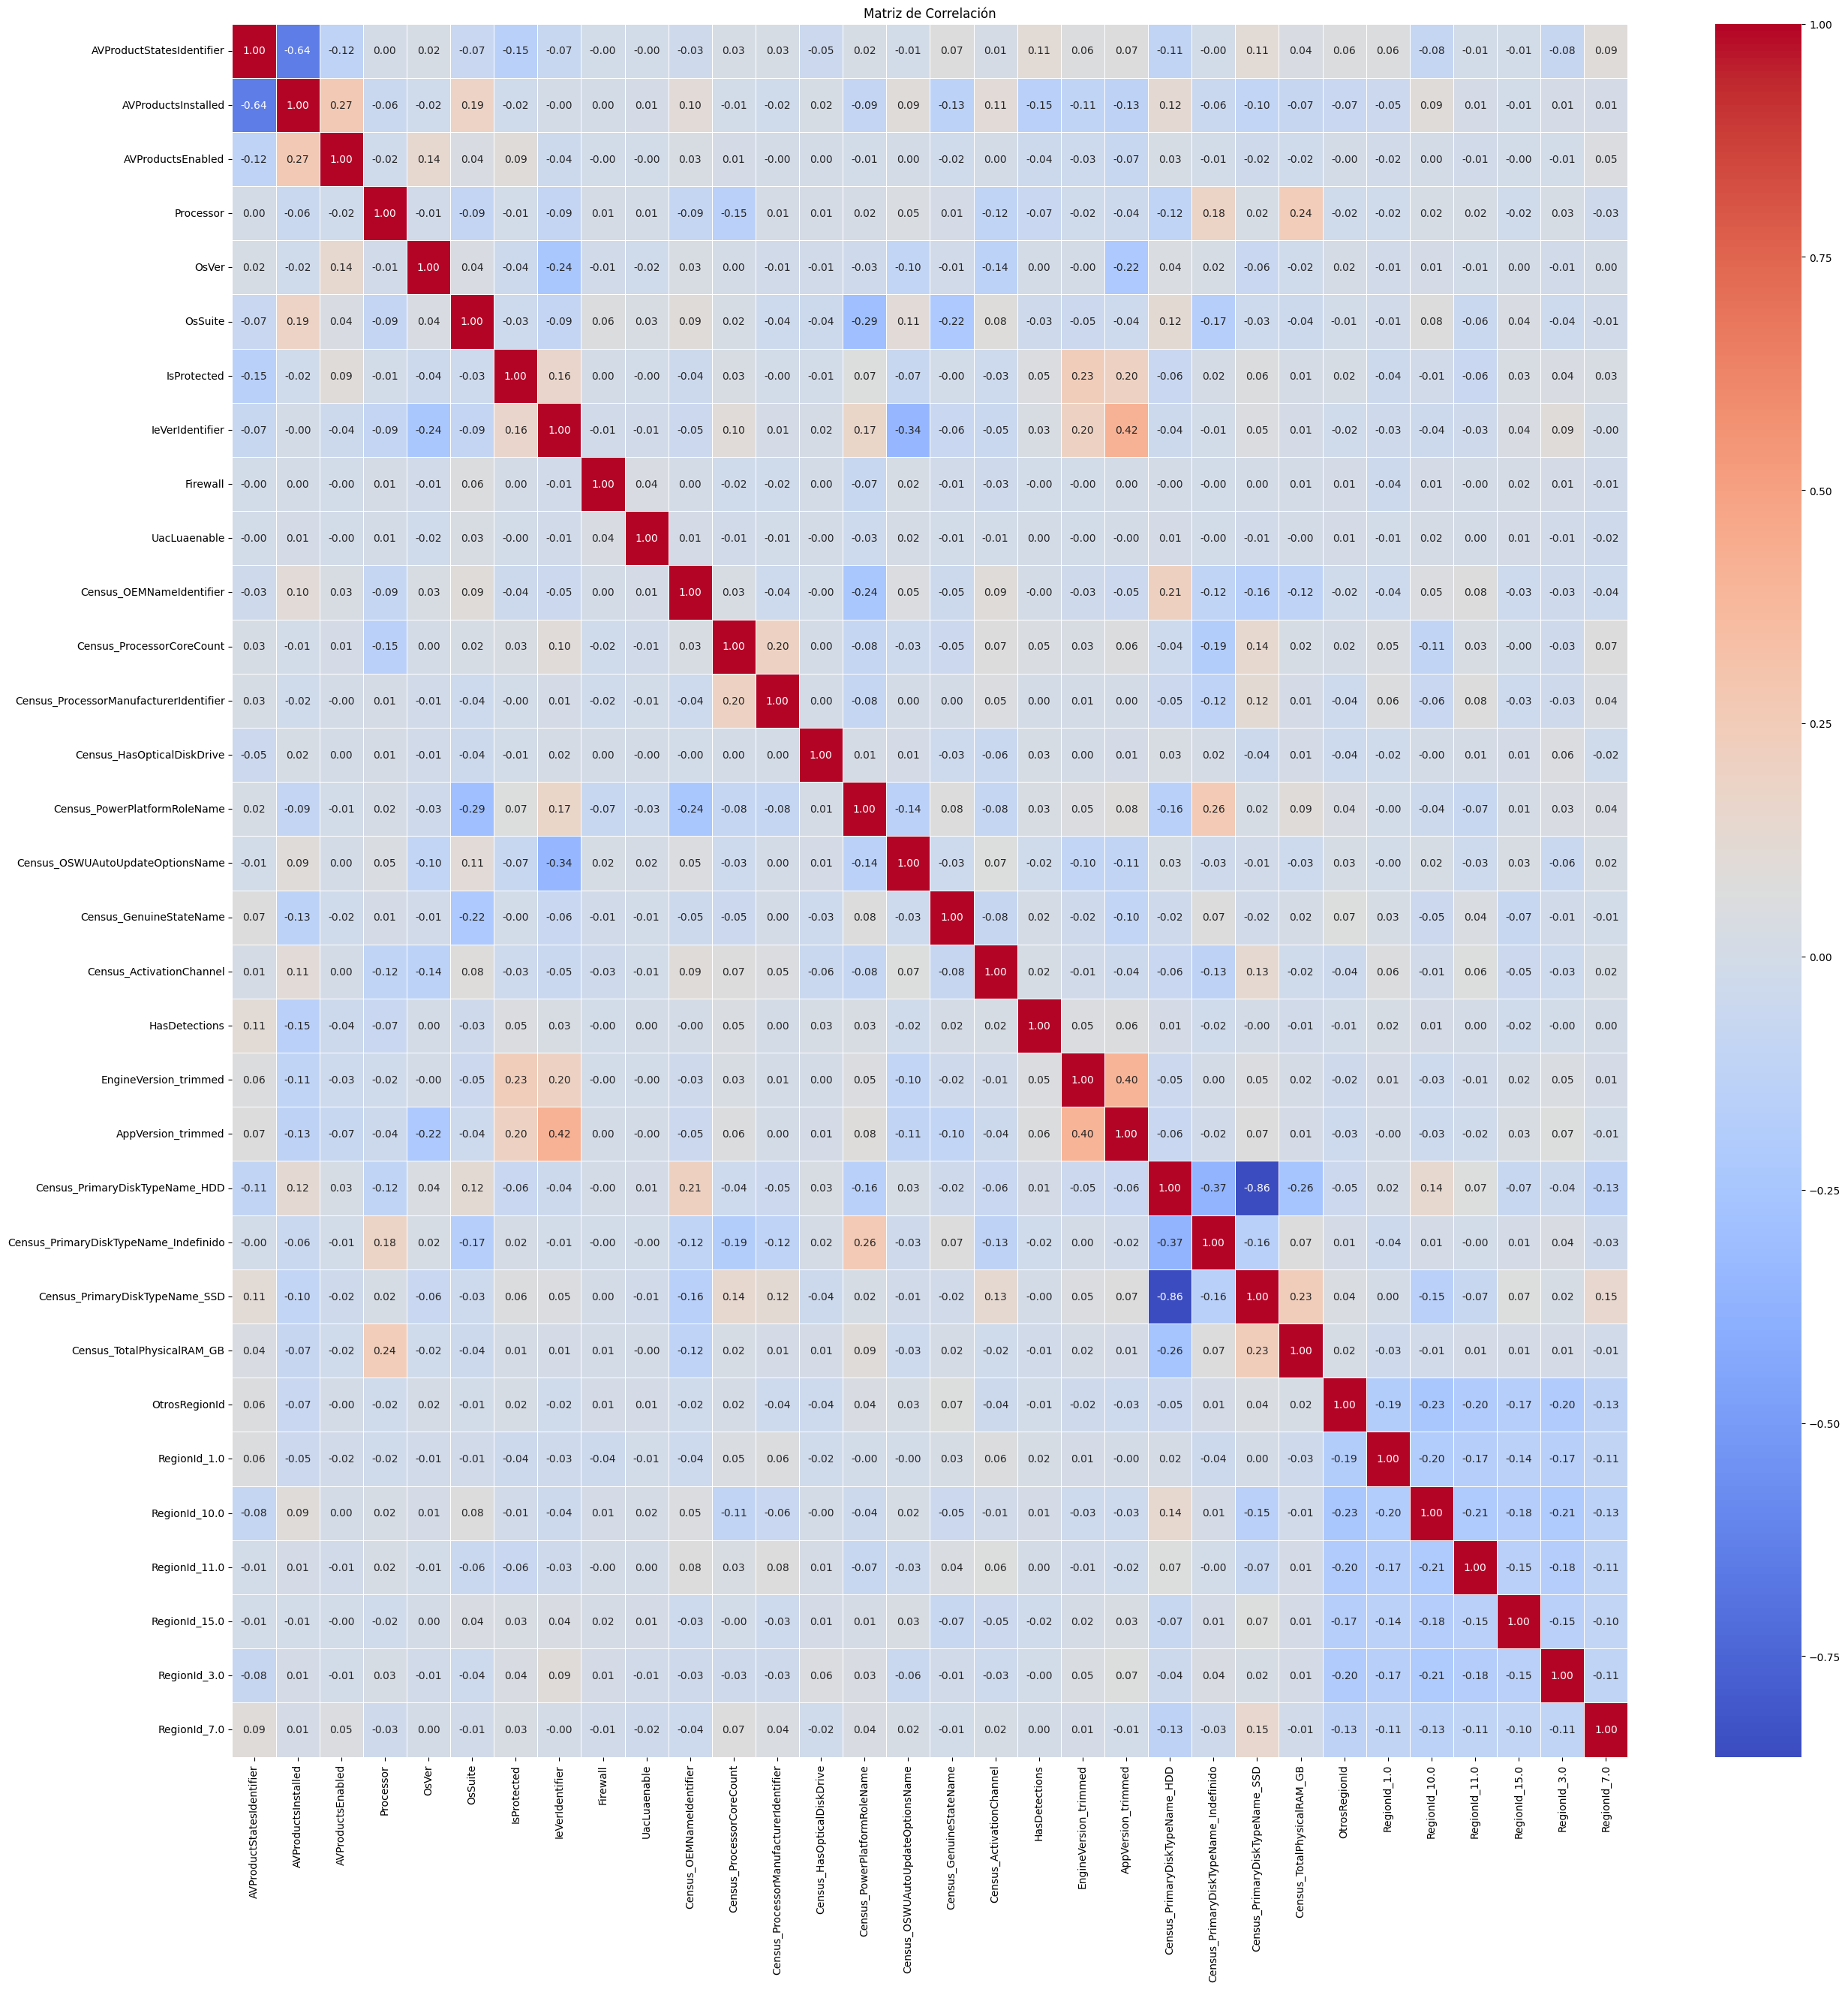

In [281]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()

## Modelo

### Primer intento con DecisionTreeClassifier

In [282]:
df_save = df.copy()
y = df.pop("HasDetections")
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

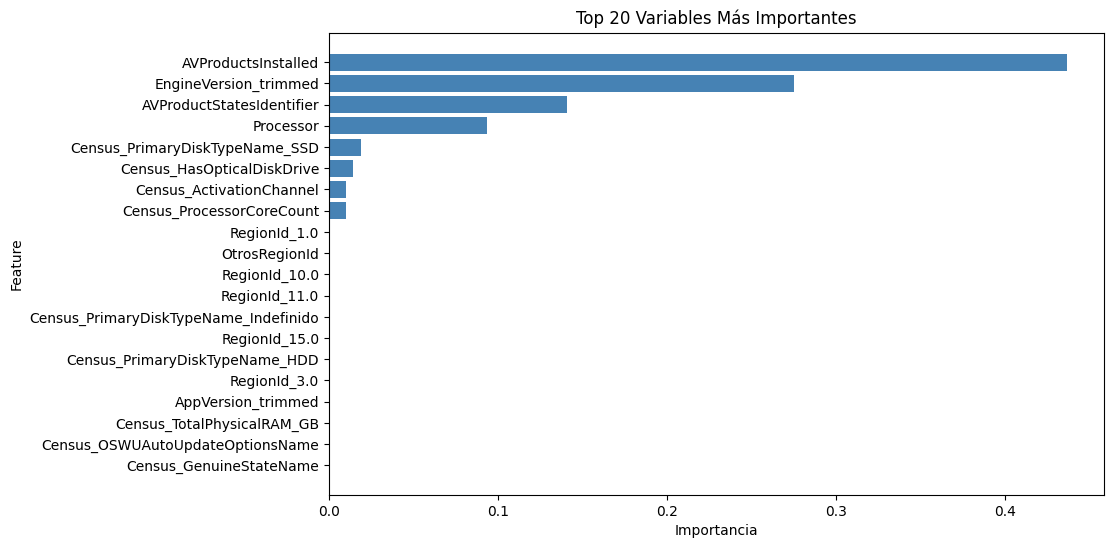

Cross-Validation Accuracy (Mean 5-Folds): 0.5923
Test Accuracy: 0.5931
                                  Feature  Importance
1                     AVProductsInstalled      0.4368
18                  EngineVersion_trimmed      0.2753
0               AVProductStatesIdentifier      0.1408
3                               Processor      0.0933
22         Census_PrimaryDiskTypeName_SSD      0.0192
13             Census_HasOpticalDiskDrive      0.0142
17               Census_ActivationChannel      0.0102
11              Census_ProcessorCoreCount      0.0101
25                           RegionId_1.0      0.0000
24                          OtrosRegionId      0.0000
26                          RegionId_10.0      0.0000
27                          RegionId_11.0      0.0000
21  Census_PrimaryDiskTypeName_Indefinido      0.0000
28                          RegionId_15.0      0.0000
20         Census_PrimaryDiskTypeName_HDD      0.0000
29                           RegionId_3.0      0.0000
19         

In [283]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=20, random_state=63)
cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

tree.fit(X_train, y_train)

y_pred_test = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)


importances = tree.feature_importances_
features = X_train.columns

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20], color='steelblue')
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.title("Top 20 Variables Más Importantes")
plt.gca().invert_yaxis() 
plt.show()

print(f'Cross-Validation Accuracy (Mean 5-Folds): {cv_scores.mean():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print(feature_importance.head(20))

### Segundo intento con DecisionTreeClassifier y con hiperparametros a mano

In [284]:
df = df_save.copy()

df.drop(columns=["RegionId_1.0", "RegionId_10.0", "RegionId_11.0", "Census_PrimaryDiskTypeName_Indefinido", 
                 "RegionId_15.0", "Census_PrimaryDiskTypeName_HDD", "RegionId_3.0", "AppVersion_trimmed", 
                 "Census_TotalPhysicalRAM_GB", "Census_OSWUAutoUpdateOptionsName", "Census_GenuineStateName"])

y = df.pop("HasDetections")
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [285]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=20, random_state=63)
cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

tree.fit(X_train, y_train)

y_pred_test = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Cross-Validation Accuracy (Mean 5-Folds): {cv_scores.mean():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Cross-Validation Accuracy (Mean 5-Folds): 0.5923
Test Accuracy: 0.5931


### Tercer intento con GridSearchCV y DecisionTreeClassifier

In [286]:
df = df_save.copy()

y = df.pop("HasDetections")
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [287]:
tree = DecisionTreeClassifier(random_state=63)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

y_pred_test = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Test Accuracy con los mejores parámetros: {test_accuracy:.4f}')

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; tot

/Users/franciscocasazolasalvatierra/miniconda3/envs/datamecum_shiny/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Test Accuracy con los mejores parámetros: 0.5991


### Primer intento con Random Forest y GridSearch

In [288]:
df = df_save.copy()

y = df.pop("HasDetections")
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [290]:
rf = RandomForestClassifier(random_state=63)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)

y_pred_test_rf = grid_search_rf.best_estimator_.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print(f'Test Accuracy Random Forest: {test_accuracy_rf:.4f}')

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, 

/Users/franciscocasazolasalvatierra/miniconda3/envs/datamecum_shiny/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  40.9s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  10.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  10.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  10.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  10.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  10.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total ti

### Primer intento con XGBOOST y GridSearch

In [291]:
df = df_save.copy()

y = df.pop("HasDetections")
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [295]:
xgb_model = xgb.XGBClassifier(random_state=63)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

print("Mejores parámetros XGBoost:", grid_search_xgb.best_params_)

y_pred_test_xgb = grid_search_xgb.best_estimator_.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f'Test Accuracy XGBoost: {test_accuracy_xgb:.4f}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_

/Users/franciscocasazolasalvatierra/miniconda3/envs/datamecum_shiny/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   4.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   4.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsampl